In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta , date
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score


In [3]:
stds = StandardScaler()

In [ ]:
#  versions de pandas, numpy et sklearn 
import sklearn
print("La version de sklearn est :", "\n", sklearn.__version__)
print("La version de numpy est :", "\n", np.__version__)
print("La version de pandas est :", "\n", pd.__version__)


La version de sklearn est : 
 1.0.2
La version de numpy est : 
 1.20.1
La version de pandas est : 
 1.3.4


In [ ]:
import sys
sys.version


'3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]'

#### Maintenance du modèle choisi à déployer
Faire une simulation de clustering avec Kmeans en entrainant un premier modèle à la date T0=31/12/2017 ;

In [ ]:
print("Dataset comportant les dates de commandes", "\n", 25*"--")
# dataset avec_montant_de_chaque_commande
data_order_id_uniq = pd.read_csv("data_order_id_uniq")
data_order_id_uniq


Dataset comportant les dates de commandes 
 ---------------------------------------------------------------------------------------------------------------------------------


,Unnamed: 0,order_id,customer_id,customer_unique_id,order_status,order_purchase_timestamp,customer_city,customer_state,payment_value_1,product_category_name_english,date_order_purchase_timestamp
0,0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,delivered,2017-05-16 15:05:35,franca,SP,146.87,office_furniture,2017-05-16 00:00:00
1,1,c1d2b34febe9cd269e378117d6681172,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,delivered,2017-11-09 00:50:13,santarem,PA,275.79,office_furniture,2017-11-09 00:00:00
2,2,b1a5d5365d330d10485e0203d54ab9e8,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,delivered,2017-05-07 20:11:26,nova santa rita,RS,140.61,office_furniture,2017-05-07 00:00:00
3,3,2e604b3614664aa66867856dba7e61b7,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,delivered,2018-02-03 19:45:40,mage,RJ,137.58,office_furniture,2018-02-03 00:00:00
4,4,574fe1739f65af76badd0999db300b4f,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,delivered,2017-03-23 15:10:17,angelina,SC,142.05,office_furniture,2017-03-23 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
99614,99614,b99217b1fcf2fdeace7b8d869b76cb91,8325d6e7af2f2bfb58cf040729b232dd,a1d53377ab83871b0ad483b03ac69d6c,delivered,2018-03-07 17:42:06,sao paulo,SP,110.44,fashion_childrens_clothes,2018-03-07 00:00:00
99615,99615,9fa3a005f89a187501fa1bd63d6125fb,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,delivered,2017-10-08 23:51:49,sao paulo,SP,54.09,fashion_childrens_clothes,2017-10-08 00:00:00
99616,99616,ee86b68eb9222b0cad7da50f4f758a35,14acb30bbc064408dcb8cdd3c92b0c97,1b553902a5bbe6ee54a3aaa7cbfb6816,delivered,2017-05-17 17:44:34,nova iguacu,RJ,124.52,fashion_childrens_clothes,2017-05-17 00:00:00
99617,99617,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,delivered,2017-01-26 11:09:00,rolim de moura,RO,209.06,security_and_services,2017-01-26 00:00:00


In [ ]:
data_order_id_uniq.drop("Unnamed: 0", axis=1, inplace=True)


In [ ]:
data_order_id_uniq.isna().mean()


order_id                         0.0
customer_id                      0.0
customer_unique_id               0.0
order_status                     0.0
order_purchase_timestamp         0.0
customer_city                    0.0
customer_state                   0.0
payment_value_1                  0.0
product_category_name_english    0.0
date_order_purchase_timestamp    0.0
dtype: float64

In [ ]:
data_order_id_uniq.dtypes


order_id                          object
customer_id                       object
customer_unique_id                object
order_status                      object
order_purchase_timestamp          object
customer_city                     object
customer_state                    object
payment_value_1                  float64
product_category_name_english     object
date_order_purchase_timestamp     object
dtype: object

In [ ]:
data_order_id_uniq[data_order_id_uniq.order_purchase_timestamp == "canceled"]


,order_id,customer_id,customer_unique_id,order_status,order_purchase_timestamp,customer_city,customer_state,payment_value_1,product_category_name_english,date_order_purchase_timestamp


In [ ]:
import datetime
from datetime import date, timedelta


In [ ]:
date_order_p = data_order_id_uniq.order_purchase_timestamp
date_order_p = date_order_p.astype(str).str.split(' ', n=1, expand=True)


In [ ]:
dt = date_order_p
data_order_id_uniq["date_order_purchase_timestamp"] = dt.iloc[:, 0].values


In [ ]:
data_order_id_uniq


,order_id,customer_id,customer_unique_id,order_status,order_purchase_timestamp,customer_city,customer_state,payment_value_1,product_category_name_english,date_order_purchase_timestamp
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,delivered,2017-05-16 15:05:35,franca,SP,146.87,office_furniture,2017-05-16
1,c1d2b34febe9cd269e378117d6681172,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,delivered,2017-11-09 00:50:13,santarem,PA,275.79,office_furniture,2017-11-09
2,b1a5d5365d330d10485e0203d54ab9e8,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,delivered,2017-05-07 20:11:26,nova santa rita,RS,140.61,office_furniture,2017-05-07
3,2e604b3614664aa66867856dba7e61b7,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,delivered,2018-02-03 19:45:40,mage,RJ,137.58,office_furniture,2018-02-03
4,574fe1739f65af76badd0999db300b4f,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,delivered,2017-03-23 15:10:17,angelina,SC,142.05,office_furniture,2017-03-23
...,...,...,...,...,...,...,...,...,...,...
99614,b99217b1fcf2fdeace7b8d869b76cb91,8325d6e7af2f2bfb58cf040729b232dd,a1d53377ab83871b0ad483b03ac69d6c,delivered,2018-03-07 17:42:06,sao paulo,SP,110.44,fashion_childrens_clothes,2018-03-07
99615,9fa3a005f89a187501fa1bd63d6125fb,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,delivered,2017-10-08 23:51:49,sao paulo,SP,54.09,fashion_childrens_clothes,2017-10-08
99616,ee86b68eb9222b0cad7da50f4f758a35,14acb30bbc064408dcb8cdd3c92b0c97,1b553902a5bbe6ee54a3aaa7cbfb6816,delivered,2017-05-17 17:44:34,nova iguacu,RJ,124.52,fashion_childrens_clothes,2017-05-17
99617,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,delivered,2017-01-26 11:09:00,rolim de moura,RO,209.06,security_and_services,2017-01-26


In [ ]:
# Typage de date_order_purchase_timestamp "string" en
# date_order_purchase_timestamp de "datetime64[ns]"
dt = data_order_id_uniq.date_order_purchase_timestamp.astype("datetime64")
data_order_id_uniq.date_order_purchase_timestamp = dt


In [ ]:
data_order_id_uniq.dtypes


order_id                                 object
customer_id                              object
customer_unique_id                       object
order_status                             object
order_purchase_timestamp                 object
customer_city                            object
customer_state                           object
payment_value_1                         float64
product_category_name_english            object
date_order_purchase_timestamp    datetime64[ns]
dtype: object

In [ ]:
print("Commandes comprise entre '2016-09-04'et '2017-12-31'", "\n", 25*"--")
dx = data_order_id_uniq["date_order_purchase_timestamp"]
data_order_id_uniq[dx.isin(pd.date_range('2016-09-04', '2017-12-31'))]


Commandes comprise entre '2016-09-04'et '2017-12-31' 
 ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,order_id,customer_id,customer_unique_id,order_status,order_purchase_timestamp,customer_city,customer_state,payment_value_1,product_category_name_english,date_order_purchase_timestamp
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,delivered,2017-05-16 15:05:35,franca,SP,146.87,office_furniture,2017-05-16
1,c1d2b34febe9cd269e378117d6681172,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,delivered,2017-11-09 00:50:13,santarem,PA,275.79,office_furniture,2017-11-09
2,b1a5d5365d330d10485e0203d54ab9e8,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,delivered,2017-05-07 20:11:26,nova santa rita,RS,140.61,office_furniture,2017-05-07
4,574fe1739f65af76badd0999db300b4f,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,delivered,2017-03-23 15:10:17,angelina,SC,142.05,office_furniture,2017-03-23
5,e0b26f14d2bcc710bb02f77a4628763b,fbd40c083aa8cddebb5265b2ba6aaf2e,f40ab89b622248b7ca125af4b486b887,delivered,2017-05-16 10:00:49,contagem,MG,155.70,office_furniture,2017-05-16
...,...,...,...,...,...,...,...,...,...,...
99612,3be3bae6f665380f803dc59c9053cf26,03eaeeab9883ef63043d7f0e0325a370,93d9e516a351a7747fc9830ae9525062,processing,2017-08-06 14:18:45,concordia,SC,66.69,fashion_childrens_clothes,2017-08-06
99615,9fa3a005f89a187501fa1bd63d6125fb,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,delivered,2017-10-08 23:51:49,sao paulo,SP,54.09,fashion_childrens_clothes,2017-10-08
99616,ee86b68eb9222b0cad7da50f4f758a35,14acb30bbc064408dcb8cdd3c92b0c97,1b553902a5bbe6ee54a3aaa7cbfb6816,delivered,2017-05-17 17:44:34,nova iguacu,RJ,124.52,fashion_childrens_clothes,2017-05-17
99617,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,delivered,2017-01-26 11:09:00,rolim de moura,RO,209.06,security_and_services,2017-01-26


In [ ]:
# observation du dataframe dans la période de '2016-09-04', '2017-12-31'
verif = data_order_id_uniq[dx.isin(pd.date_range('2016-09-04', '2017-12-31'))]
verif


,order_id,customer_id,customer_unique_id,order_status,order_purchase_timestamp,customer_city,customer_state,payment_value_1,product_category_name_english,date_order_purchase_timestamp
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,delivered,2017-05-16 15:05:35,franca,SP,146.87,office_furniture,2017-05-16
1,c1d2b34febe9cd269e378117d6681172,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,delivered,2017-11-09 00:50:13,santarem,PA,275.79,office_furniture,2017-11-09
2,b1a5d5365d330d10485e0203d54ab9e8,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,delivered,2017-05-07 20:11:26,nova santa rita,RS,140.61,office_furniture,2017-05-07
4,574fe1739f65af76badd0999db300b4f,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,delivered,2017-03-23 15:10:17,angelina,SC,142.05,office_furniture,2017-03-23
5,e0b26f14d2bcc710bb02f77a4628763b,fbd40c083aa8cddebb5265b2ba6aaf2e,f40ab89b622248b7ca125af4b486b887,delivered,2017-05-16 10:00:49,contagem,MG,155.70,office_furniture,2017-05-16
...,...,...,...,...,...,...,...,...,...,...
99612,3be3bae6f665380f803dc59c9053cf26,03eaeeab9883ef63043d7f0e0325a370,93d9e516a351a7747fc9830ae9525062,processing,2017-08-06 14:18:45,concordia,SC,66.69,fashion_childrens_clothes,2017-08-06
99615,9fa3a005f89a187501fa1bd63d6125fb,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,delivered,2017-10-08 23:51:49,sao paulo,SP,54.09,fashion_childrens_clothes,2017-10-08
99616,ee86b68eb9222b0cad7da50f4f758a35,14acb30bbc064408dcb8cdd3c92b0c97,1b553902a5bbe6ee54a3aaa7cbfb6816,delivered,2017-05-17 17:44:34,nova iguacu,RJ,124.52,fashion_childrens_clothes,2017-05-17
99617,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,delivered,2017-01-26 11:09:00,rolim de moura,RO,209.06,security_and_services,2017-01-26


In [ ]:
# nombre de lignes par client
verif.customer_unique_id.value_counts()


8d50f5eadf50201ccdcedfb9e2ac8455    10
a40096fc0a3862e9e12bc55b5f8e6ab2     6
12f5d6e1cbf93dafd9dcc19095df0b3d     6
3e43e6105506432c953e165fb2acf44c     5
6469f99c1f9dfae7733b25662e7f1782     5
                                    ..
4f65988c2f9e8e23b372dbb590d9df49     1
03860720a9bb240fe64390835d7c1b7a     1
ea74738436e9be0cc383049234b5ad51     1
71205b9daf992360e033d1d37517d02d     1
141e824b8e0df709e3fcf6d982225a8e     1
Name: customer_unique_id, Length: 43768, dtype: int64

In [ ]:
# observation des données du client "8d50f5eadf50201ccdcedfb9e2ac8455"
verif[verif.customer_unique_id == "8d50f5eadf50201ccdcedfb9e2ac8455"]


,order_id,customer_id,customer_unique_id,order_status,order_purchase_timestamp,customer_city,customer_state,payment_value_1,product_category_name_english,date_order_purchase_timestamp
11689,b850a16d8faf65a74c51287ef34379ce,1bd3585471932167ab72a84955ebefea,8d50f5eadf50201ccdcedfb9e2ac8455,delivered,2017-11-22 20:01:53,sao paulo,SP,21.77,sports_leisure,2017-11-22
13458,369634708db140c5d2c4e365882c443a,b2b13de0770e06de50080fea77c459e6,8d50f5eadf50201ccdcedfb9e2ac8455,delivered,2017-06-18 22:56:48,sao paulo,SP,51.75,sports_leisure,2017-06-18
13526,bf92c69b7cc70f7fc2c37de43e366173,42dbc1ad9d560637c9c4c1533746f86d,8d50f5eadf50201ccdcedfb9e2ac8455,delivered,2017-07-24 22:11:50,sao paulo,SP,166.71,sports_leisure,2017-07-24
14703,5d848f3d93a493c1c8955e018240e7ca,0e4fdc084a6b9329ed55d62dcd653ccf,8d50f5eadf50201ccdcedfb9e2ac8455,shipped,2017-05-15 23:30:03,sao paulo,SP,22.77,sports_leisure,2017-05-15
14950,cd4b336a02aacabd0ef22f6db711f95e,89be66634d68fa73a95499b6352e085d,8d50f5eadf50201ccdcedfb9e2ac8455,delivered,2017-10-18 23:25:04,sao paulo,SP,37.77,sports_leisure,2017-10-18
15035,e3071b7624445af6e4f3a1b23718667d,0bf8bf19944a7f8b40ba86fef778ca7c,8d50f5eadf50201ccdcedfb9e2ac8455,delivered,2017-09-05 22:14:52,sao paulo,SP,51.75,sports_leisure,2017-09-05
22441,5837a2c844decae8a778657425f6d664,31dd055624c66f291578297a551a6cdf,8d50f5eadf50201ccdcedfb9e2ac8455,unavailable,2017-07-17 22:11:13,sao paulo,SP,25.59,Other,2017-07-17
23662,519203404f6116d406a970763ee75799,1c62b48fb34ee043310dcb233caabd2e,8d50f5eadf50201ccdcedfb9e2ac8455,delivered,2017-08-05 08:59:43,sao paulo,SP,81.89,Other,2017-08-05
87154,4f62d593acae92cea3c5662c76122478,dfb941d6f7b02f57a44c3b7c3fefb44b,8d50f5eadf50201ccdcedfb9e2ac8455,delivered,2017-07-18 23:10:58,sao paulo,SP,21.77,fashion_bags_accessories,2017-07-18
87155,89d9b111d2b990deb5f5f9769f92800b,9a1afef458843a022e431f4cb304dfe9,8d50f5eadf50201ccdcedfb9e2ac8455,delivered,2017-10-29 16:58:02,sao paulo,SP,21.77,fashion_bags_accessories,2017-10-29


In [ ]:
df = verif[verif.customer_unique_id == "8d50f5eadf50201ccdcedfb9e2ac8455"]
df.date_order_purchase_timestamp.nunique()


10

In [ ]:
print("On a là pour ce client 10 commandes différentes")
print("on montre ainsi différents achats effectués par le client",
      "'8d50f5eadf50201ccdcedfb9e2ac8455' ", "\n", 25*"--")


On a là pour ce client 10 commandes différentes
on montre ainsi différents achats effectués par le client '8d50f5eadf50201ccdcedfb9e2ac8455'  
 -----------------------------------------------------------------------


In [ ]:
# observation des données du client "a40096fc0a3862e9e12bc55b5f8e6ab2"
verif[verif.customer_unique_id == "a40096fc0a3862e9e12bc55b5f8e6ab2"]


,order_id,customer_id,customer_unique_id,order_status,order_purchase_timestamp,customer_city,customer_state,payment_value_1,product_category_name_english,date_order_purchase_timestamp
7128,d839ea07a528e914f89702508023da37,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,delivered,2017-10-11 14:49:49,rio de janeiro,RJ,310.69,home_confort,2017-10-11
22793,aec47b9987c836ffee2d7664b0929ec1,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,delivered,2017-10-10 18:31:36,rio de janeiro,RJ,91.70,Other,2017-10-10
27950,d839ea07a528e914f89702508023da37,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,delivered,2017-10-11 14:49:49,rio de janeiro,RJ,310.69,furniture_decor,2017-10-11
32616,dbe73e59815a2106ffcba61fa14592e9,039bbed64cc5e2160b7ca4ac6b09449c,a40096fc0a3862e9e12bc55b5f8e6ab2,delivered,2017-10-11 14:49:50,rio de janeiro,RJ,54.79,furniture_decor,2017-10-11
57447,d839ea07a528e914f89702508023da37,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,delivered,2017-10-11 14:49:49,rio de janeiro,RJ,310.69,bed_bath_table,2017-10-11
59167,aec47b9987c836ffee2d7664b0929ec1,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,delivered,2017-10-10 18:31:36,rio de janeiro,RJ,91.70,bed_bath_table,2017-10-10


In [ ]:
print ("On remarque pour ce client des commandes dupliquées à cause de la",
       "variable 'product_category_name_english' différent d'une ligne à une",
       "autre pour la même commande, assurément une commande de 3 articles de",
       "noms différents, une commande de 2 articles différents et 1e commande",
       "de 54.79 real (au final 3 commandes pour ce client). Pour cela, il",
       "convient de soustraire certaines variables à l'origine de duplicatas.")


On remarque pour ce client des commandes dupliquées à cause de la variable 'product_category_name_english' qui diffère d'une ligne à une autre pour la même commande, assurément une commande de 3 articles de noms différents, une commande de 2 articles différents et une commande de 54.79 real (au final 3 commandes pour ce client). Pour cela, il convient de soustraire certaines variables à l'origine de duplicatas.


In [ ]:
# défintion dataset du client 'a40096fc0a3862e9e12bc55b5f8e6ab2'
dt = verif.customer_unique_id
verif_a_cust = verif[dt == "a40096fc0a3862e9e12bc55b5f8e6ab2"]


In [ ]:
verif_a_cust


,order_id,customer_id,customer_unique_id,order_status,order_purchase_timestamp,customer_city,customer_state,payment_value_1,product_category_name_english,date_order_purchase_timestamp
7128,d839ea07a528e914f89702508023da37,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,delivered,2017-10-11 14:49:49,rio de janeiro,RJ,310.69,home_confort,2017-10-11
22793,aec47b9987c836ffee2d7664b0929ec1,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,delivered,2017-10-10 18:31:36,rio de janeiro,RJ,91.70,Other,2017-10-10
27950,d839ea07a528e914f89702508023da37,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,delivered,2017-10-11 14:49:49,rio de janeiro,RJ,310.69,furniture_decor,2017-10-11
32616,dbe73e59815a2106ffcba61fa14592e9,039bbed64cc5e2160b7ca4ac6b09449c,a40096fc0a3862e9e12bc55b5f8e6ab2,delivered,2017-10-11 14:49:50,rio de janeiro,RJ,54.79,furniture_decor,2017-10-11
57447,d839ea07a528e914f89702508023da37,eee74b2a9aa0989243d2793c1a90fbf6,a40096fc0a3862e9e12bc55b5f8e6ab2,delivered,2017-10-11 14:49:49,rio de janeiro,RJ,310.69,bed_bath_table,2017-10-11
59167,aec47b9987c836ffee2d7664b0929ec1,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,delivered,2017-10-10 18:31:36,rio de janeiro,RJ,91.70,bed_bath_table,2017-10-10


In [ ]:
verif_a_cust.columns


Index(['order_id', 'customer_id', 'customer_unique_id', 'order_status',
       'order_purchase_timestamp', 'customer_city', 'customer_state',
       'payment_value_1', 'product_category_name_english',
       'date_order_purchase_timestamp'],
      dtype='object')

In [ ]:
print("Suppression de order_status car les commandes faites et livrées n'ont",
      "pas forcément le même status, pourtant au final elles sont livrées",
      "\n", 20*"---")


Suppression de order_status car les commandes faites et livrées n'ont pas forcément le même status, pourtant au final elles sont livrées 
 ------------------------------------------------------------


In [ ]:
# réduction de nombre de variables(élimination de variables susceptibles
# d'être à l'origine de duplicatas)
verif_a_cust_ = verif_a_cust[['order_id', 'customer_unique_id',
                              'order_purchase_timestamp',
                              'payment_value_1',
                              'date_order_purchase_timestamp']]


In [ ]:
verif_a_cust_ = verif_a_cust_.drop_duplicates()


In [ ]:
print("calcul de 'monetary'", "\n", 30*"--")
verif_a_cust_.groupby('customer_unique_id')["payment_value_1"].sum().values


calcul de 'monetary' 
 ----------------------------------------------------------------------------------------------------------------------------------


array([457.18])

In [ ]:
# date de dernier achat réalisé par le client 'a40096fc0a3862e9e12bc55b5f8e6ab2'
verif_a_cust_.date_order_purchase_timestamp.max() 

Timestamp('2017-10-11 00:00:00')

In [ ]:
# définition de T_0 type datatime
T_0 = pd.to_datetime("2017-12-31")
T_0


Timestamp('2017-12-31 00:00:00')

In [ ]:
print("calcul de recency", "\n", 20*"---")
delta=T_0-verif_a_cust_.date_order_purchase_timestamp.max()
delta.days


calcul de recency 
 --------------------------------------------------------------------------------------------------


81

In [ ]:
delta


Timedelta('81 days 00:00:00')

In [ ]:
print("calcul de Frequency" "\n", 20*"---")
verif_a_cust_.groupby(['customer_unique_id'])["order_id"].value_counts()


calcul de Frequency 
 ------------------------------------------------------------------------------


customer_unique_id                order_id                        
a40096fc0a3862e9e12bc55b5f8e6ab2  aec47b9987c836ffee2d7664b0929ec1    1
                                  d839ea07a528e914f89702508023da37    1
                                  dbe73e59815a2106ffcba61fa14592e9    1
Name: order_id, dtype: int64

In [ ]:
# fichier rfm du client 'a40096fc0a3862e9e12bc55b5f8e6ab2'
# sur la période avant T_0 et T_0

recency = T_0 - verif_a_cust_.date_order_purchase_timestamp.max()
gt = verif_a_cust_.groupby('customer_unique_id')
frequency = gt["order_id"].value_counts().sum()
monetary = gt["payment_value_1"].sum().values
rrffmm = pd.DataFrame({"Recency": recency.days,
                       "Frequency": frequency, "Monetary": monetary})
rrffmm


,Recency,Frequency,Monetary
0,81,3,457.18


In [ ]:
data_order_id_uniq


,order_id,customer_id,customer_unique_id,order_status,order_purchase_timestamp,customer_city,customer_state,payment_value_1,product_category_name_english,date_order_purchase_timestamp
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,delivered,2017-05-16 15:05:35,franca,SP,146.87,office_furniture,2017-05-16
1,c1d2b34febe9cd269e378117d6681172,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,delivered,2017-11-09 00:50:13,santarem,PA,275.79,office_furniture,2017-11-09
2,b1a5d5365d330d10485e0203d54ab9e8,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,delivered,2017-05-07 20:11:26,nova santa rita,RS,140.61,office_furniture,2017-05-07
3,2e604b3614664aa66867856dba7e61b7,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,delivered,2018-02-03 19:45:40,mage,RJ,137.58,office_furniture,2018-02-03
4,574fe1739f65af76badd0999db300b4f,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,delivered,2017-03-23 15:10:17,angelina,SC,142.05,office_furniture,2017-03-23
...,...,...,...,...,...,...,...,...,...,...
99614,b99217b1fcf2fdeace7b8d869b76cb91,8325d6e7af2f2bfb58cf040729b232dd,a1d53377ab83871b0ad483b03ac69d6c,delivered,2018-03-07 17:42:06,sao paulo,SP,110.44,fashion_childrens_clothes,2018-03-07
99615,9fa3a005f89a187501fa1bd63d6125fb,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,delivered,2017-10-08 23:51:49,sao paulo,SP,54.09,fashion_childrens_clothes,2017-10-08
99616,ee86b68eb9222b0cad7da50f4f758a35,14acb30bbc064408dcb8cdd3c92b0c97,1b553902a5bbe6ee54a3aaa7cbfb6816,delivered,2017-05-17 17:44:34,nova iguacu,RJ,124.52,fashion_childrens_clothes,2017-05-17
99617,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,delivered,2017-01-26 11:09:00,rolim de moura,RO,209.06,security_and_services,2017-01-26


In [ ]:
data_order_id_uniq.isna().mean()


order_id                         0.0
customer_id                      0.0
customer_unique_id               0.0
order_status                     0.0
order_purchase_timestamp         0.0
customer_city                    0.0
customer_state                   0.0
payment_value_1                  0.0
product_category_name_english    0.0
date_order_purchase_timestamp    0.0
dtype: float64

In [ ]:
# dataset de base pour le calcul de nos scores ari par découpage de tous
# les clients et de commande dans le temps
ari_base_dataset = data_order_id_uniq[['order_id', 'customer_id',
                                       'customer_unique_id',
                                       'order_purchase_timestamp',
                                       'payment_value_1',
                                       'date_order_purchase_timestamp']]


In [ ]:
# suppression des lignes multiples de commande et garder la première
ari_base_dataset = ari_base_dataset.drop_duplicates()


In [ ]:
# on peut aisément tenir compte des dates
ari_base_dataset


,order_id,customer_id,customer_unique_id,order_purchase_timestamp,payment_value_1,date_order_purchase_timestamp
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,146.87,2017-05-16
1,c1d2b34febe9cd269e378117d6681172,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2017-11-09 00:50:13,275.79,2017-11-09
2,b1a5d5365d330d10485e0203d54ab9e8,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,2017-05-07 20:11:26,140.61,2017-05-07
3,2e604b3614664aa66867856dba7e61b7,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,2018-02-03 19:45:40,137.58,2018-02-03
4,574fe1739f65af76badd0999db300b4f,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,2017-03-23 15:10:17,142.05,2017-03-23
...,...,...,...,...,...,...
99612,3be3bae6f665380f803dc59c9053cf26,03eaeeab9883ef63043d7f0e0325a370,93d9e516a351a7747fc9830ae9525062,2017-08-06 14:18:45,66.69,2017-08-06
99615,9fa3a005f89a187501fa1bd63d6125fb,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,2017-10-08 23:51:49,54.09,2017-10-08
99616,ee86b68eb9222b0cad7da50f4f758a35,14acb30bbc064408dcb8cdd3c92b0c97,1b553902a5bbe6ee54a3aaa7cbfb6816,2017-05-17 17:44:34,124.52,2017-05-17
99617,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,2017-01-26 11:09:00,209.06,2017-01-26


In [ ]:
ari_base_dataset.to_csv("ari_base_dataset")


In [ ]:
ari_base_dataset.dtypes


order_id                                 object
customer_id                              object
customer_unique_id                       object
order_purchase_timestamp                 object
payment_value_1                         float64
date_order_purchase_timestamp    datetime64[ns]
dtype: object

In [ ]:
print("Commandes comprise entre '2016-09-04'et T0='2017-12-31'","\n",20*"---")

# défintion du datset évolutif ici pour la période <= '2017-12-31'
dt = ari_base_dataset.date_order_purchase_timestamp
ari_base_dataset_period = ari_base_dataset[dt <= pd.to_datetime('2017-12-31')]

# list de valeur des variable recency , frequency et monetary
dx = ari_base_dataset_period.groupby('customer_unique_id')
list_recency = T_0 - dx["date_order_purchase_timestamp"].max()
list_frequency = dx["order_id"].count().values
list_monetary = dx["payment_value_1"].sum().values

# fichier rfm correspondant
rfm=pd.DataFrame({"Recency": list_recency,
                  "Frequency": list_frequency,
                  "Monetary": list_monetary })


Commandes comprise entre '2016-09-04'et T0='2017-12-31' 
 ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
rfm[rfm.Monetary == 146.87]


,customer_unique_id,Recency_days,Frequency,Monetary
22940,861eff4711a542e4b93843c6dd7febb0,229,1,146.87


In [ ]:
rfm[rfm.Monetary == 209.06]


,customer_unique_id,Recency_days,Frequency,Monetary
37113,d8bee9ec375c3a0f9ef8ed7456a51dcd,339,1,209.06


In [ ]:
# observation de la variable Recency des clients
rfm.sort_values("Recency", ascending=False)


,Recency,Frequency,Monetary
customer_unique_id,,,
b7d76e111c89f7ebf14761390f0f7d17,483 days,1,136.23
830d5b7aaa3b6f1e9ad63703bec97d23,472 days,1,143.46
10e89fd8e5c745f81bec101207ba4d7d,454 days,1,92.27
2f64e403852e6893ae37485d5fcacdaf,454 days,1,39.09
8d3a54507421dbd2ce0a1d58046826e0,454 days,1,133.46
...,...,...,...
1d1c83a7ec3d0ddf7aec597d14c6f558,0 days,1,92.73
3fc033ed99a69646ac510af8c33be70a,0 days,1,64.79
ffa8a7cd286a3431406fcb483d63df92,0 days,1,49.10


In [ ]:
# on peut observer les dernières commandes effectuées
# par chaque client sur toute la base de données
dx = ari_base_dataset.groupby('customer_unique_id')
dx["date_order_purchase_timestamp"].max()


customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2   2018-05-10
0000b849f77a49e4a4ce2b2a4ca5be3f   2018-05-07
0000f46a3911fa3c0805444483337064   2017-03-10
0000f6ccb0745a6a4b88665a16c9f078   2017-10-12
0004aac84e0df4da2b147fca70cf8255   2017-11-14
                                      ...    
fffcf5a5ff07b0908bd4e2dbc735a684   2017-06-08
fffea47cd6d3cc0a88bd621562a9d061   2017-12-10
ffff371b4d645b6ecea244b27531430a   2017-02-07
ffff5962728ec6157033ef9805bacc48   2018-05-02
ffffd2657e2aad2907e67c3e9daecbeb   2017-05-02
Name: date_order_purchase_timestamp, Length: 95560, dtype: datetime64[ns]

In [ ]:
# extraction de date uniquement grâce à la fonction split
# pour la période <= '2017-12-31'
difference_of_date = T_0 - dx["date_order_purchase_timestamp"].max()
pd_difference_of_dat = pd.DataFrame({"difference_of_date": difference_of_date})
pd_difference_of_dat = pd_difference_of_dat.difference_of_date.astype(str)
pd_difference_of_dat = pd_difference_of_dat.str.split('days',
                                                      n=1, expand=True)

pd_difference_of_dat = pd_difference_of_dat.iloc[:, :-1].astype("int64")
pd_difference_of_dat


,0
customer_unique_id,
0000f46a3911fa3c0805444483337064,296
0000f6ccb0745a6a4b88665a16c9f078,80
0004aac84e0df4da2b147fca70cf8255,47
0005e1862207bf6ccc02e4228effd9a0,302
0006fdc98a402fceb4eb0ee528f6a8d4,166
...,...
fffbf87b7a1a6fa8b03f081c5f51a201,4
fffcf5a5ff07b0908bd4e2dbc735a684,206
fffea47cd6d3cc0a88bd621562a9d061,21


In [ ]:
list_recency = pd_difference_of_dat[0].values


In [ ]:
list_recency


array([296,  80,  47, ...,  21, 327, 243], dtype=int64)

In [ ]:
dt = ari_base_dataset.customer_unique_id
ari_base_dataset[dt == "1b6c7548a2a1f9037c1fd3ddfed95f33"]


,order_id,customer_id,customer_unique_id,order_purchase_timestamp,payment_value_1,date_order_purchase_timestamp
4532,ab6d1b0b8360c208b62852f53726f0e6,c2ff01bd4fa72f9487ee397f6c5989d2,1b6c7548a2a1f9037c1fd3ddfed95f33,2017-12-20 09:56:35,160.37,2017-12-20
30503,a8347ba04591f966205182a1c99c310e,53e16f83735cfe02bf83ef6481ca241e,1b6c7548a2a1f9037c1fd3ddfed95f33,2017-12-04 21:11:15,62.11,2017-12-04
32813,75b71f40b3c71469d12c7e4dc2ce0794,ee5c2e36a79081c2440e61990ec2f3af,1b6c7548a2a1f9037c1fd3ddfed95f33,2018-01-25 12:47:39,187.43,2018-01-25
33510,bba17d97a5a45416d0782d5d07fe740d,9a4578c9dd9dce6517d583cb5eca0276,1b6c7548a2a1f9037c1fd3ddfed95f33,2017-12-05 09:13:27,63.60,2017-12-05
48585,43f08913407cac4e74a898d968e58c1a,fff7466a253c0e59499ea943462c10f9,1b6c7548a2a1f9037c1fd3ddfed95f33,2018-02-14 13:22:12,166.19,2018-02-14
75689,54f334d6a9d60b69dae5409327f73645,95b9cacc4bc81c3a0a33967bcde6fcd8,1b6c7548a2a1f9037c1fd3ddfed95f33,2017-11-24 13:01:09,267.16,2017-11-24
78357,abbd44be67f3cad08ffac14daf36af60,41a16488effb86580d7a89f8aa19a03b,1b6c7548a2a1f9037c1fd3ddfed95f33,2017-11-13 16:44:41,52.15,2017-11-13


In [ ]:
# le nombre de commandes par client
# qu'on pourrait stocker dans une liste
ari_base_dataset.groupby(['customer_unique_id'])["order_id"].count().values


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
# client ayant réalisé plusieurs commandes sont en tête
dx["order_id"].count().sort_values(ascending=False)


customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
564feb90710b4f84399f931fa97ea704     1
564fb2956ed34f0a78c1cc37d731f3d9     1
564f89ca1f5371992bf1fb87a0331ac3     1
564f521732e1fbf5424fa01f0a5d41ff     1
ffffd2657e2aad2907e67c3e9daecbeb     1
Name: order_id, Length: 95560, dtype: int64

In [ ]:
# définition par semaine des périodes de mesure de la stabilité
# du modèle initial
T_0 = pd.to_datetime("2017-12-31")
T = []
for i in range(0, 36):
  dat = pd.to_datetime(T_0 + i*timedelta(days=7)).strftime("%Y-%m-%d %H:%M:%S")
  T.append(dat)
T


['2017-12-31 00:00:00',
 '2018-01-07 00:00:00',
 '2018-01-14 00:00:00',
 '2018-01-21 00:00:00',
 '2018-01-28 00:00:00',
 '2018-02-04 00:00:00',
 '2018-02-11 00:00:00',
 '2018-02-18 00:00:00',
 '2018-02-25 00:00:00',
 '2018-03-04 00:00:00',
 '2018-03-11 00:00:00',
 '2018-03-18 00:00:00',
 '2018-03-25 00:00:00',
 '2018-04-01 00:00:00',
 '2018-04-08 00:00:00',
 '2018-04-15 00:00:00',
 '2018-04-22 00:00:00',
 '2018-04-29 00:00:00',
 '2018-05-06 00:00:00',
 '2018-05-13 00:00:00',
 '2018-05-20 00:00:00',
 '2018-05-27 00:00:00',
 '2018-06-03 00:00:00',
 '2018-06-10 00:00:00',
 '2018-06-17 00:00:00',
 '2018-06-24 00:00:00',
 '2018-07-01 00:00:00',
 '2018-07-08 00:00:00',
 '2018-07-15 00:00:00',
 '2018-07-22 00:00:00',
 '2018-07-29 00:00:00',
 '2018-08-05 00:00:00',
 '2018-08-12 00:00:00',
 '2018-08-19 00:00:00',
 '2018-08-26 00:00:00',
 '2018-09-02 00:00:00']

In [ ]:
ari_base_dataset


,order_id,customer_id,customer_unique_id,order_purchase_timestamp,payment_value_1,date_order_purchase_timestamp
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,146.87,2017-05-16
1,c1d2b34febe9cd269e378117d6681172,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2017-11-09 00:50:13,275.79,2017-11-09
2,b1a5d5365d330d10485e0203d54ab9e8,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,2017-05-07 20:11:26,140.61,2017-05-07
3,2e604b3614664aa66867856dba7e61b7,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,2018-02-03 19:45:40,137.58,2018-02-03
4,574fe1739f65af76badd0999db300b4f,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,2017-03-23 15:10:17,142.05,2017-03-23
...,...,...,...,...,...,...
99612,3be3bae6f665380f803dc59c9053cf26,03eaeeab9883ef63043d7f0e0325a370,93d9e516a351a7747fc9830ae9525062,2017-08-06 14:18:45,66.69,2017-08-06
99615,9fa3a005f89a187501fa1bd63d6125fb,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,2017-10-08 23:51:49,54.09,2017-10-08
99616,ee86b68eb9222b0cad7da50f4f758a35,14acb30bbc064408dcb8cdd3c92b0c97,1b553902a5bbe6ee54a3aaa7cbfb6816,2017-05-17 17:44:34,124.52,2017-05-17
99617,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,2017-01-26 11:09:00,209.06,2017-01-26


In [ ]:
ari_base_dataset.date_order_purchase_timestamp.max()


Timestamp('2018-09-03 00:00:00')

In [ ]:
# définition d'une fonction d'obtention de rfm pour chaque période


def rfm_period(T_k):
    """
    Retourne les tableaux rfm périodiques non standardisés et standardisés.
    Paramètres :
    T_k -- la date supérieure de la prériode définie.
    T_k -- type string "AAAA-MM-JJ".
    """
    data = ari_base_dataset.copy()
    # dataset évolutif en fonction des semaines

    data_T_k = data[data.date_order_purchase_timestamp <= pd.to_datetime(T_k)]

    # T_k devient la T_max à chaque fois et on change de type
    # on passe du 'string' au 'datetime64'
    T_max = data_T_k.date_order_purchase_timestamp.max()

    # calcul de la différence de date pour la défintion prochaine de recency
    group = data_T_k.groupby('customer_unique_id')
    dif_date = T_max-group["date_order_purchase_timestamp"].max()

    # création de Dataframe à séparer avec la fonction split
    # et ne garder que la date
    pd_dif = pd.DataFrame({"dif_date": dif_date})

    # récencement des listes recency, frequency et monetary
    # ainsi que les identifants uniques de chaque client
    list_recency = pd_dif.dif_date.astype(str)
    list_recency = list_recency.str.split('days', n=1, expand=True)
    list_recency = list_recency.iloc[:, :-1][0].astype("int64").values

    list_frequency = group["order_id"].count().values
    list_monetary = group["payment_value_1"].sum().values
    list_customer_unique_id = group["payment_value_1"].sum().index

    # défintion de dataset rfm et le dataset rfm standardisé(rfm_scaled)
    rfm = pd.DataFrame({"customer_unique_id": list_customer_unique_id,
                        "Recency_days": list_recency,
                        "Frequency": list_frequency,
                        "Monetary": list_monetary})

    rfm_scaled = pd.DataFrame(stds.fit_transform(rfm.iloc[:, 1:]),
                              columns=rfm.iloc[:, 1:].columns)

    return [rfm, rfm_scaled]


**Clusters sur la période < T_0 = 2017-12-31 00:00:00**

In [ ]:
rfm, rfm_scaled = rfm_period('2017-12-31')


In [ ]:
rfm_scaled


,Recency_days,Frequency,Monetary
0,1.588401,-0.158845,-0.337598
1,-0.599669,-0.158845,-0.519130
2,-0.933958,-0.158845,0.134004
3,1.649180,-0.158845,-0.065298
4,0.271507,-0.158845,-0.581431
...,...,...,...
43763,-1.369546,-0.158845,0.007997
43764,0.676705,-0.158845,8.104959
43765,-1.197336,-0.158845,-0.344586
43766,1.902429,-0.158845,-0.225780


In [ ]:
rfm


,customer_unique_id,Recency_days,Frequency,Monetary
0,0000f46a3911fa3c0805444483337064,296,1,86.22
1,0000f6ccb0745a6a4b88665a16c9f078,80,1,43.62
2,0004aac84e0df4da2b147fca70cf8255,47,1,196.89
3,0005e1862207bf6ccc02e4228effd9a0,302,1,150.12
4,0006fdc98a402fceb4eb0ee528f6a8d4,166,1,29.00
...,...,...,...,...
43763,fffbf87b7a1a6fa8b03f081c5f51a201,4,1,167.32
43764,fffcf5a5ff07b0908bd4e2dbc735a684,206,1,2067.42
43765,fffea47cd6d3cc0a88bd621562a9d061,21,1,84.58
43766,ffff371b4d645b6ecea244b27531430a,327,1,112.46


In [ ]:
# définition de fonction de KMeans avec la definition de model.labels_
kmeans__model_4 = KMeans(max_iter=1000, n_clusters=4, random_state=0)
kmeans__model_4 = kmeans__model_4.fit(rfm_scaled)


In [ ]:
# définition de fonction de calcul de clusters qui nous intéresse
def calcul_cluster_KMeans(k, X_stdS):
    """
    Retourne un tableau commportant les données rfm standardisées et
    ajoute leur numéro de partitionnement.
    L'algorithme de clustering non hiérarchique KMeans est utilisé.
    Paramètres:
    k -- est le nombre de clusters choisi.
    X_stdS -- les données rfm standardisées.
    """
    print("modèle avec {} clusters".format(k))
    X_standardscaled = X_stdS.copy()
    kmeans_mo = KMeans(max_iter=1000, n_clusters=k, random_state=0).fit(X_stdS)

    X_standardscaled["cluster_(k)"] = kmeans_mo.labels_
    return X_standardscaled


In [ ]:
# définition de la visualisation des cluster 2D et 3D


def visualisation_cluster_KMeans(k, cluster_calculated, kmeans_model_):

    """
    Retourne des visualisations 2D et 3D avec les axes recency frequency
    et monetary.
    Paramètres:
    k -- le nombre de clusters choisi.
    cluster_calculated -- tableau commportant les données rfm standardisées et
    les numéros de partitionnement.
    pour les numéros créer une variable du nom de 'cluster_(k)'.
    kmeans_model_ -- modèle de clustering ayant appris des données normalisées.
    """

    # Tracé 2D des différents clusters, avec les features pris 2 à 2
    plt.figure(figsize=(20, 15))

    plt.subplot(3, 3, 1)
    plt.scatter(cluster_calculated["Recency_days"],
                cluster_calculated["Monetary"],
                c=cluster_calculated['cluster_(k)'], cmap=plt.cm.Set2)
    plt.xlabel("Recency_days")
    plt.ylabel("Monetary")
    plt.title("clusters Recency_days / Monetary")
    # Labeling the clusters
    centers = kmeans_model_.cluster_centers_
    # Draw white circles at cluster centers
    plt.scatter(
            centers[:, 0],
            centers[:, 2],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

    for i, c in enumerate(centers):
        plt.scatter(c[0], c[2], marker="$%d$" % i, alpha=1, s=50,
                    edgecolor="k")

    plt.subplot(3, 3, 2)
    plt.scatter(cluster_calculated["Recency_days"],
                cluster_calculated["Frequency"],
                c=cluster_calculated['cluster_(k)'], cmap=plt.cm.Set2)
    plt.xlabel("Recency_days")
    plt.ylabel("Frequency")
    plt.title("clusters Recency_days/ Frequency")

    plt.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

    for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1,
                    s=50, edgecolor="k")

    plt.subplot(3, 3, 3)
    plt.scatter(cluster_calculated["Frequency"],
                cluster_calculated["Monetary"],
                c=cluster_calculated['cluster_(k)'], cmap=plt.cm.Set2)

    plt.xlabel("Frequency")
    plt.ylabel("Monetary")
    plt.title("clusters Monetary/ Frequency")

    plt.scatter(
            centers[:, 1],
            centers[:, 2],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

    for i, c in enumerate(centers):
        plt.scatter(c[1], c[2], marker="$%d$" % i, alpha=1, s=50,
                    edgecolor="k")
    plt.suptitle("Visualisation 2D des profils n_clusters égal à {}".format(k),
                 fontsize=14, fontweight="bold")

    # Tracé du résultat en 3D
    fig = plt.figure(figsize=(12, 12))
    ax = fig.gca(projection='3d')  # Affichage en 3D
    ax.scatter(cluster_calculated["Frequency"],
               cluster_calculated["Recency_days"],
               cluster_calculated["Monetary"],
               c=cluster_calculated['cluster_(k)'],
               cmap=plt.cm.Set2, label='Courbe', marker='d')

    ax.set_xlabel('Frequency')
    ax.set_ylabel('Recency_days')
    ax.set_zlabel('Monetary')

    plt.suptitle("Visualisation 3D modèle KMeans n_cluster = {}".format(k),
                 fontsize=14, fontweight="bold")

    plt.show()


modèle avec 4 clusters


C:\Users\nokan\AppData\Local\Temp/ipykernel_33724/2853382181.py:75: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')  # Affichage en 3D


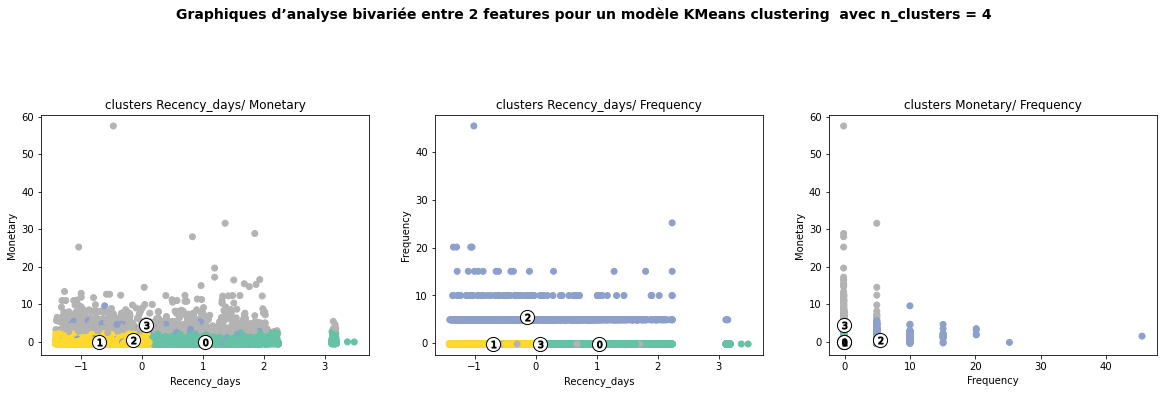

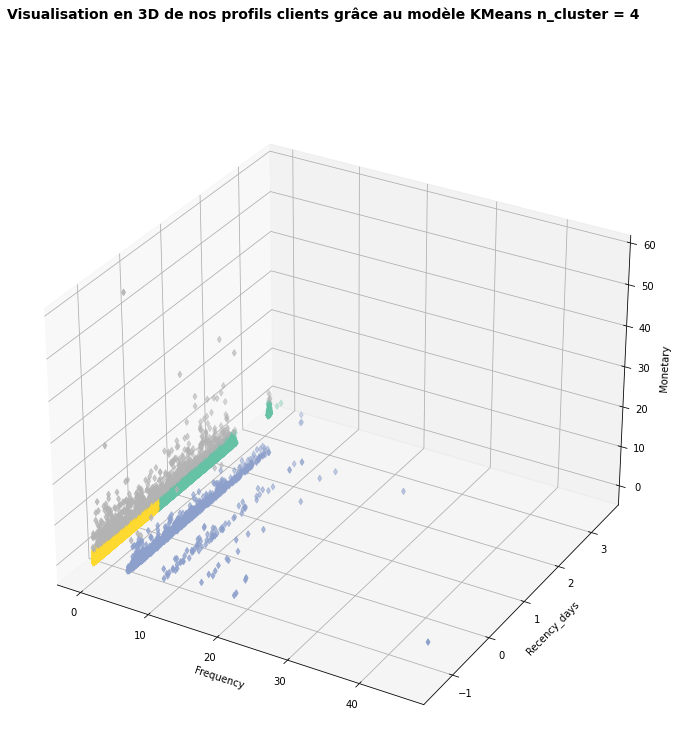

In [ ]:
# visualisation du modèle kmeans__model_4 = 
# KMeans(max_iter=1000, n_clusters=4, random_state=0).fit(rfm_scaled)
cluster_calculated = calcul_cluster_KMeans(4, rfm_scaled)
visualisation_cluster_KMeans(4, cluster_calculated, kmeans__model_4)


**Clusters sur la période <= T_0 + 7 jours = '2018-01-07 00:00:00'**

In [ ]:
rfm_1, rfm_scaled_1 = rfm_period('2018-01-07')


In [ ]:
rfm_scaled_1


,Recency_days,Frequency,Monetary
0,1.607306,-0.15875,-0.338962
1,-0.546793,-0.15875,-0.521601
2,-0.875891,-0.15875,0.135515
3,1.667142,-0.15875,-0.065003
4,0.310858,-0.15875,-0.584281
...,...,...,...
45104,-1.304716,-0.15875,0.008739
45105,0.709765,-0.15875,8.155048
45106,-1.135181,-0.15875,-0.345993
45107,1.916459,-0.15875,-0.226463


In [ ]:
# définition de fonction de KMeans avec la definition de model.labels_
kmeans__model_4_1 = KMeans(max_iter=1000, n_clusters=4, random_state=0)
kmeans__model_4_1 = kmeans__model_4_1.fit(rfm_scaled_1)


In [ ]:
cluster_calculated_1 = calcul_cluster_KMeans(4,rfm_scaled_1)


modèle avec 4 clusters


C:\Users\nokan\AppData\Local\Temp/ipykernel_33724/2853382181.py:75: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')  # Affichage en 3D


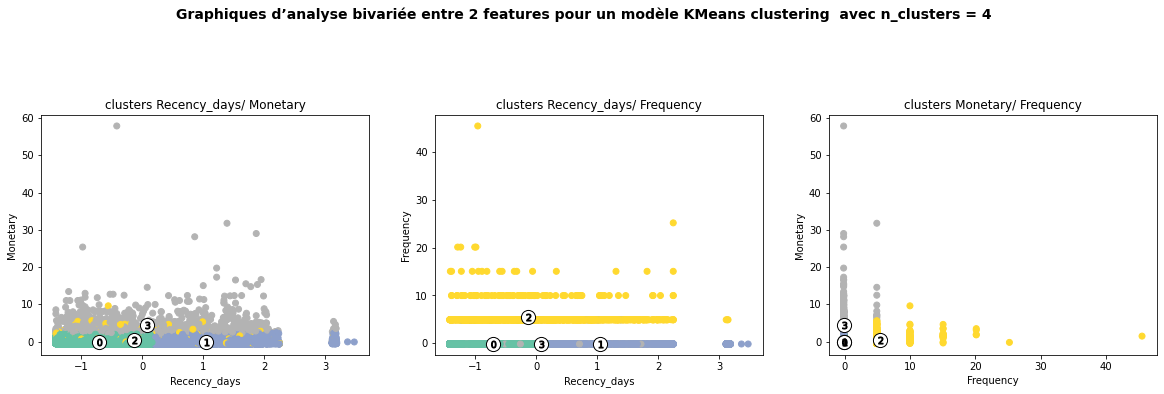

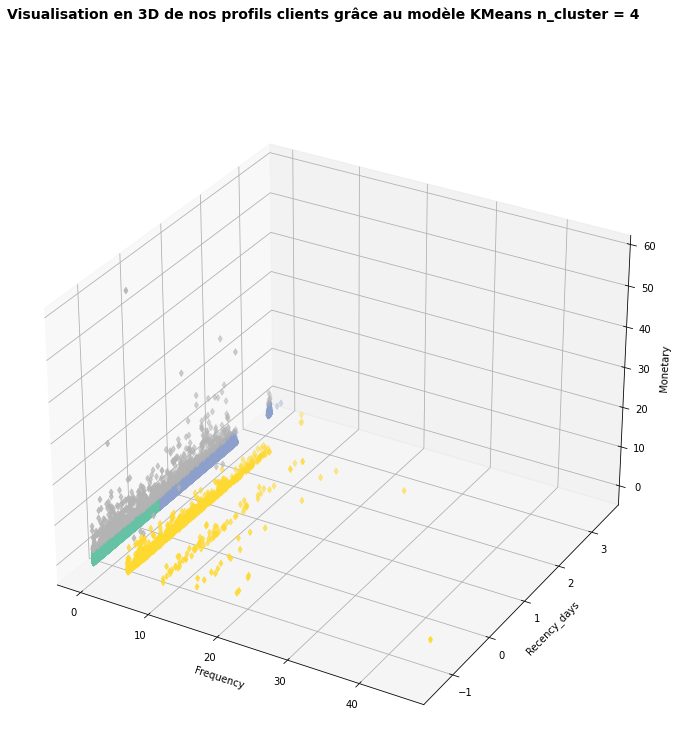

In [ ]:
visualisation_cluster_KMeans(4,cluster_calculated_1,kmeans__model_4_1)


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

##### cohérence entre groupes de départ et le partitionnement trouvé par K-means avec ARI

In [ ]:
# standardisation des données de la période <= T_0 + 7 jours
# ( à la date de '2018-01-07) avec S0
stds = StandardScaler()
S0 = stds.fit(rfm.iloc[:, 1:])


In [ ]:
rfm_1.iloc[:, 1:]


,Recency_days,Frequency,Monetary
0,303,1,86.22
1,87,1,43.62
2,54,1,196.89
3,309,1,150.12
4,173,1,29.00
...,...,...,...
45104,11,1,167.32
45105,213,1,2067.42
45106,28,1,84.58
45107,334,1,112.46


In [ ]:
print("le modèle choisi reste-t-il fiable avec les nouvelles données ?")
rfm_new_S0 = pd.DataFrame(S0.transform(rfm_1.iloc[:, 1:]),
                          columns=rfm_1.iloc[:, 1:].columns)
print("Le score ARI est :",
      adjusted_rand_score(kmeans__model_4.predict(rfm_new_S0),
                          kmeans__model_4_1.labels_))

le modèle choisi reste-t-il fiable avec les nouvelles données ?
Le score ARI est : 0.9659894179930113


In [ ]:
print("La prédiction de notre modèle est adaptée aux nouvelles données",
      "c'est à dire un semaine après la mise en production.","\n",50*"--")

La prédiction de notre modèle est adaptée aux nouvelles donnéesc'est à dire un semaine après la mise en production. 
 ----------------------------------------------------------------------------------------------------


In [ ]:
print("Proposons donc un algorithme itératif pour estimer le délai",
      "de maintenance du modèle initialement créé.","\n",
      "Si le score ARI <0.8, il est alors pertinent de proposer",
      "un nouveau modèle au client.")

Proposons donc un algorithme itératif pour estimer le délai de maintenance du modèle initialement créé. 
 Si le score ARI <0.8, il est alors pertinent de proposer un nouveau modèle au client.


In [ ]:
# Dataset comportant toutes les commandes délivrées ne contenant 
# pas de duplicatas de commandes

ari_base_dataset = pd.read_csv("ari_base_dataset")
ari_base_dataset.drop("Unnamed: 0", axis=1, inplace=True)


In [ ]:
ari_base_dataset


,order_id,customer_id,customer_unique_id,order_purchase_timestamp,payment_value_1,date_order_purchase_timestamp
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,146.87,2017-05-16
1,c1d2b34febe9cd269e378117d6681172,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2017-11-09 00:50:13,275.79,2017-11-09
2,b1a5d5365d330d10485e0203d54ab9e8,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,2017-05-07 20:11:26,140.61,2017-05-07
3,2e604b3614664aa66867856dba7e61b7,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,2018-02-03 19:45:40,137.58,2018-02-03
4,574fe1739f65af76badd0999db300b4f,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,2017-03-23 15:10:17,142.05,2017-03-23
...,...,...,...,...,...,...
98811,3be3bae6f665380f803dc59c9053cf26,03eaeeab9883ef63043d7f0e0325a370,93d9e516a351a7747fc9830ae9525062,2017-08-06 14:18:45,66.69,2017-08-06
98812,9fa3a005f89a187501fa1bd63d6125fb,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,2017-10-08 23:51:49,54.09,2017-10-08
98813,ee86b68eb9222b0cad7da50f4f758a35,14acb30bbc064408dcb8cdd3c92b0c97,1b553902a5bbe6ee54a3aaa7cbfb6816,2017-05-17 17:44:34,124.52,2017-05-17
98814,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,2017-01-26 11:09:00,209.06,2017-01-26


In [ ]:
ari_base_dataset.dtypes


order_id                          object
customer_id                       object
customer_unique_id                object
order_purchase_timestamp          object
payment_value_1                  float64
date_order_purchase_timestamp     object
dtype: object

In [ ]:
dz = ari_base_dataset.date_order_purchase_timestamp.astype('datetime64')
ari_base_dataset.date_order_purchase_timestamp = dz


In [ ]:
ari_base_dataset.dtypes


order_id                                 object
customer_id                              object
customer_unique_id                       object
order_purchase_timestamp                 object
payment_value_1                         float64
date_order_purchase_timestamp    datetime64[ns]
dtype: object

In [ ]:
# transformer d'échelle (pour la standardisation)
stds = StandardScaler()


In [ ]:
# Définissons notre modèle à mettre en production
# ainsi que l'entrainement de son transformer stds_0
from sklearn.cluster import KMeans
# définition de rfm et rfm_scaled pour des dates inférieures à '2018-01-01'
rfm_0, rfm_scaled_0 = rfm_period("2017-12-31")

# entrainement des données pour la standardisation
# des nouvelles données semaine par semaine

stds_0 = stds.fit(rfm_0.iloc[:, 1:])
#  définition du modèle à déployer 
kmeans_model_0 = KMeans(max_iter=1000, n_clusters=4, n_init=1, random_state=0)
kmeans_model_0 = kmeans_model_0.fit(rfm_scaled_0)


In [ ]:
# fonction pour obtention du graphique d'évolution du score ARI
# (défintion des valeurs du ARI par semaine)


def ari_score(T):
    """
    Retourne une liste ari mesure de ressemblance de clusters.
    Paramètres :
    T -- liste de série de dates à intervalle de temps régulier
    (ici intervalle d'une semaine).
    T -- type list.
    T[i] -- type datatime64 --> 'AAAA-MM-JJ'
    """
    # récupération des valeurs de ARI à intervalles de 7 jours
    # à compter de 2017-12-31 au 2018-09-02
    list_ari = []

    for T_k in T:
        # Définition du nouveau modèle
        rfm_k, rfm_scaled_k = rfm_period(T_k)
        kmeans_model_k = KMeans(max_iter=1000, n_clusters=4,
                                n_init=1, random_state=0).fit(rfm_scaled_k)

        # Prédiction des clusters par le modèle initial et le modèle récent
        rfm_new_stds_0 = pd.DataFrame(stds_0.transform(rfm_k.iloc[:, 1:]),
                                      columns=rfm_k.iloc[:, 1:].columns)
        labels_true = kmeans_model_0.predict(rfm_new_stds_0)
        labels_pred = kmeans_model_k.labels_

        # liste des valeurs de ari
        list_ari.append(adjusted_rand_score(labels_true, labels_pred))

    return list_ari


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
list_ari_score__ = ari_score(T)


In [ ]:
A = ari_score(T)


In [ ]:
A


[0.3034643861307383,
 0.31850805879305066,
 0.32131075712597335,
 0.33806150169597465,
 0.36378889560180294,
 0.32836990471736976,
 0.39879397640923014,
 0.4287921210341584,
 0.44774261194430587,
 0.471939284846203,
 0.4911417295532964,
 0.5129209088798192,
 0.522188439047694,
 0.541549740368233,
 0.5650435133548274,
 0.596788889840457,
 0.6164452628297992,
 0.46469215804043984,
 0.6666788394112346,
 0.2345563668077919,
 0.7127357093943946,
 0.7393155560749396,
 0.42565809487133305,
 0.7865322168749879,
 0.4175816211447903,
 0.4152679968647326,
 0.8607920784004467,
 0.8912207673407359,
 0.925555718161906,
 0.9523312479501093,
 0.9622455211058961,
 0.9644208124763345,
 0.9842376387154188,
 0.800260738133187,
 0.8935147913644313,
 0.38506491638689233]

In [ ]:
list_n_semaines = np.arange(0, 36)


In [ ]:
list_ari_score__


[1.0,
 0.983376937994057,
 0.9921714915653465,
 0.9836980172169493,
 0.9692816854016404,
 0.49335577697291805,
 0.9776878572498802,
 0.9710621291596195,
 0.9569299403815832,
 0.9567462752174231,
 0.9578500376681209,
 0.9351408876445086,
 0.9446689330777027,
 0.9461002961267552,
 0.9495022464900145,
 0.9440932502043545,
 0.9422781236437027,
 0.4023581291267852,
 0.9380801755964546,
 0.18809816116922862,
 0.9251077585968005,
 0.9255547248157981,
 0.4063957410796415,
 0.9370746696755541,
 0.4024619351719594,
 0.39872858588394583,
 0.9308622704462839,
 0.9234326929958866,
 0.917478683845869,
 0.9056945217967346,
 0.9063192521977591,
 0.8534264686012711,
 0.8329892190686069,
 0.9579127932175631,
 0.9566460970869328,
 0.38668603243813704]

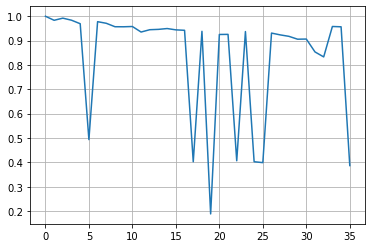

In [ ]:
plt.plot(list_n_semaines, list_ari_score__)
plt.grid()


C:\Users\nokan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


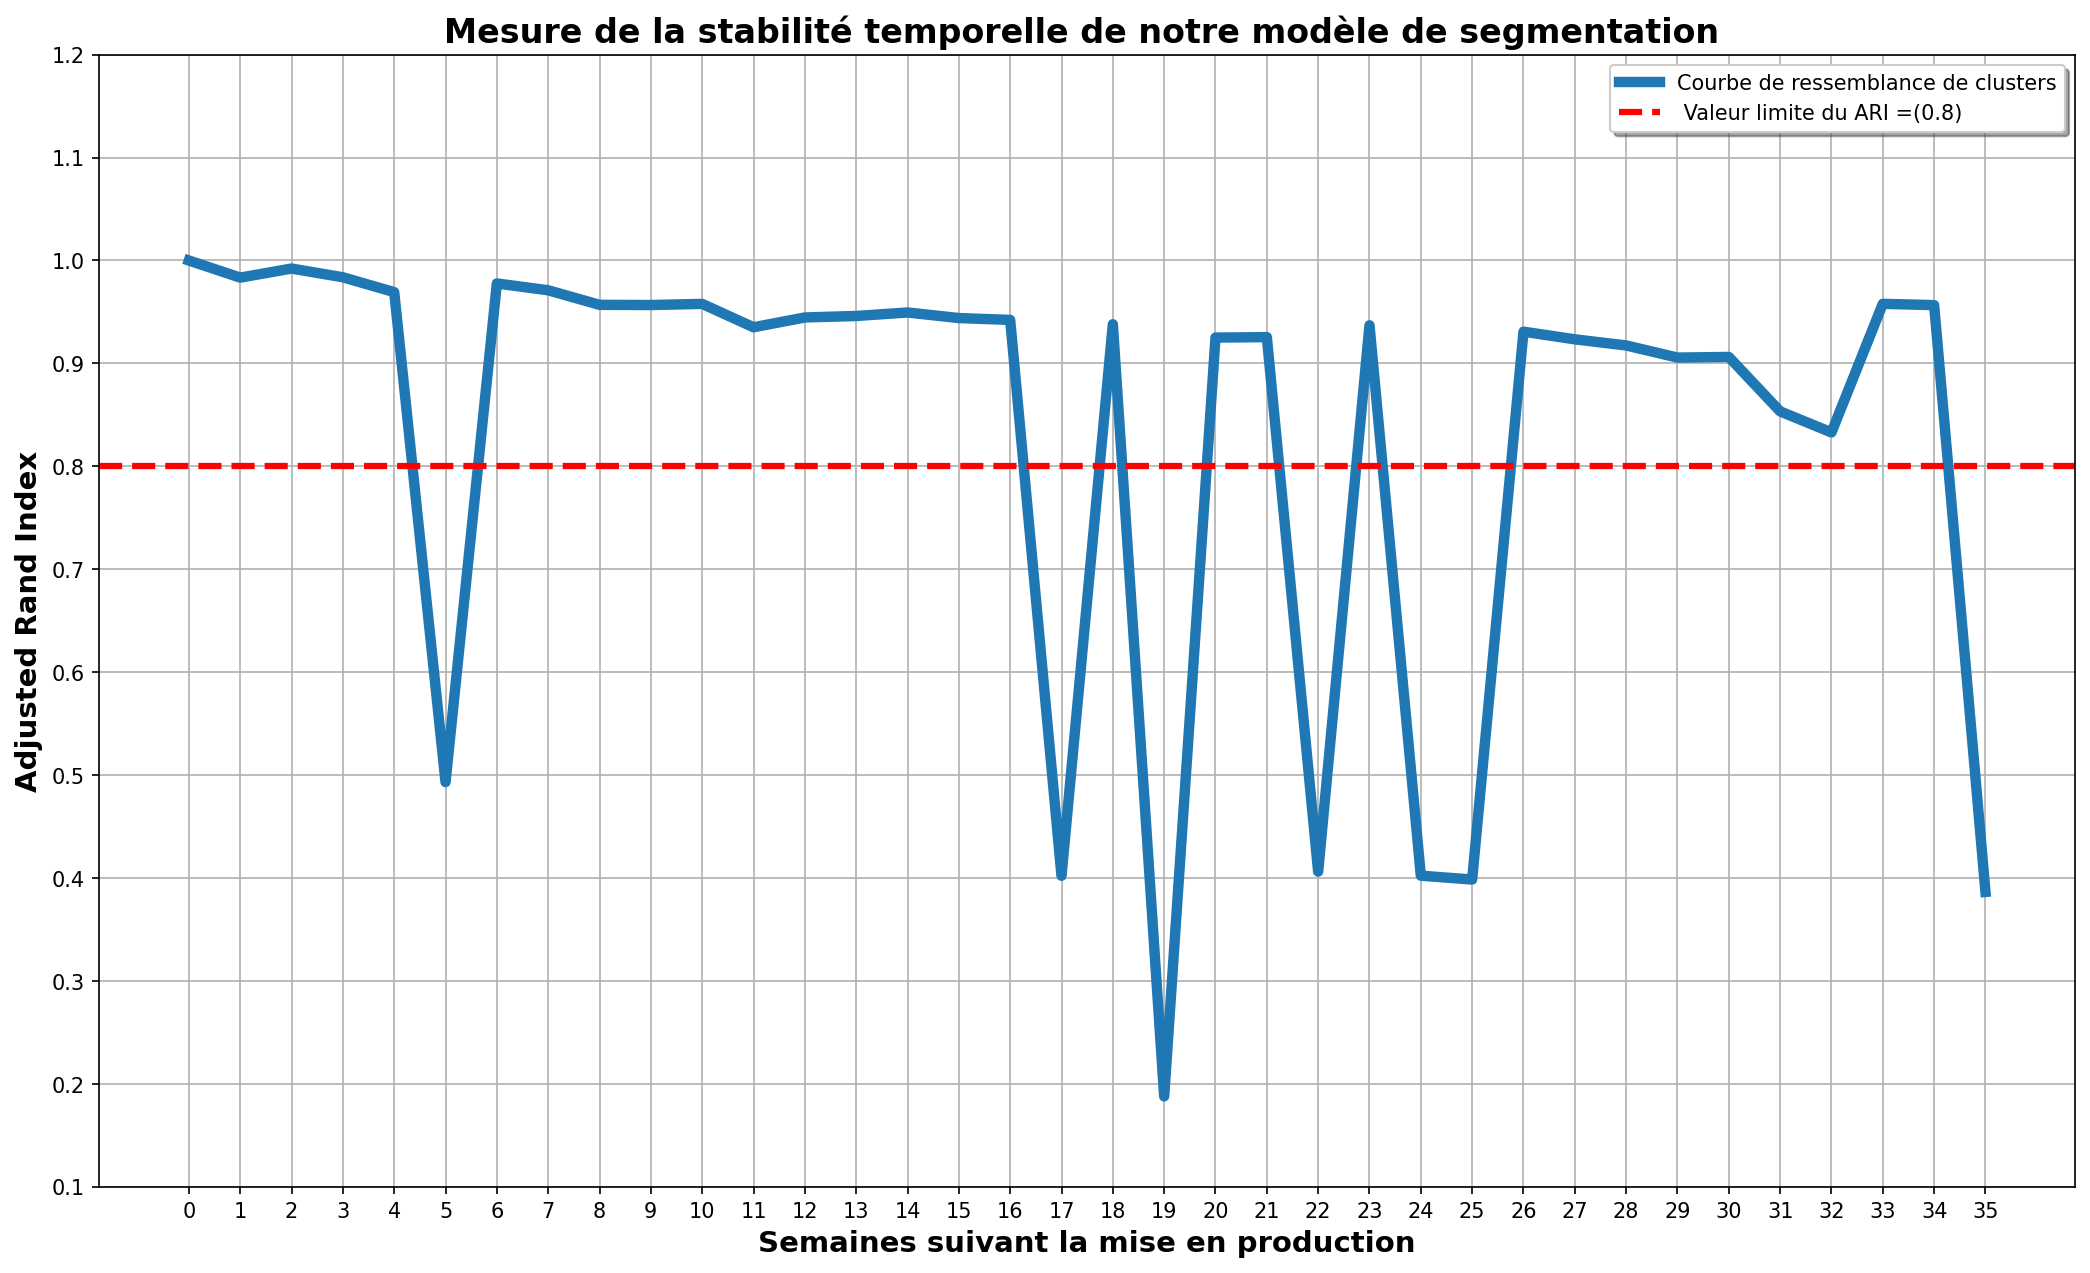

In [ ]:
# tracé de la courbe ARI en fonction du temps (en semaines ici)
plt.figure(figsize=(17, 10), dpi=150)    
list_n_semaines = np.arange(0,36)
sns.lineplot(list_n_semaines, list_ari_score__, linewidth=5,
             label="Courbe de ressemblance de clusters")
plt.axhline(y=0.8, linestyle="--", c="red", linewidth=3,
            label=" Valeur limite du ARI =({})".format(0.8))

plt.title("Mesure de la stabilité temporelle de notre modèle de segmentation ",
          fontsize=16,fontweight="bold")
plt.xlabel("Semaines suivant la mise en production",
           fontsize=14,fontweight="bold")
plt.xticks(np.arange(0, 36, 1)) 

plt.yticks(np.arange(-300, 100, 0.1)) 
plt.ylim(0.1, 1.2)
plt.ylabel("Adjusted Rand Index", fontsize=14,fontweight="bold")

plt.grid(True)
plt.legend(shadow=True)
plt.show()


#### Conclusion
En ce qui concerne le délai, on observe ci-dessus le graphique permettant la visualisation de la stabilité temporelle du modèle de segmentation à déployer. Le modèle est stable dans les 4 semaines suivant son déploiement puis à la 5ème semaine le ARI_score descend en dessous de 0.8 puis se stabilise de nouveau au dessus de ari_score= 0.8 à partir de la 6ème semaine jusqu'à la 16 ème suivie d'une grande période d'instabilité.

Au vu de ce qui précède, a priori le délai de maintenance conseillée est de 1 mois (chaque fin du mois).

In [ ]:
ari_base_dataset


,order_id,customer_id,customer_unique_id,order_purchase_timestamp,payment_value_1,date_order_purchase_timestamp
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,146.87,2017-05-16
1,c1d2b34febe9cd269e378117d6681172,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2017-11-09 00:50:13,275.79,2017-11-09
2,b1a5d5365d330d10485e0203d54ab9e8,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,2017-05-07 20:11:26,140.61,2017-05-07
3,2e604b3614664aa66867856dba7e61b7,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,2018-02-03 19:45:40,137.58,2018-02-03
4,574fe1739f65af76badd0999db300b4f,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,2017-03-23 15:10:17,142.05,2017-03-23
...,...,...,...,...,...,...
99612,3be3bae6f665380f803dc59c9053cf26,03eaeeab9883ef63043d7f0e0325a370,93d9e516a351a7747fc9830ae9525062,2017-08-06 14:18:45,66.69,2017-08-06
99615,9fa3a005f89a187501fa1bd63d6125fb,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,2017-10-08 23:51:49,54.09,2017-10-08
99616,ee86b68eb9222b0cad7da50f4f758a35,14acb30bbc064408dcb8cdd3c92b0c97,1b553902a5bbe6ee54a3aaa7cbfb6816,2017-05-17 17:44:34,124.52,2017-05-17
99617,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,2017-01-26 11:09:00,209.06,2017-01-26


In [ ]:
ari_base_dataset.columns


Index(['order_id', 'customer_id', 'customer_unique_id',
       'order_purchase_timestamp', 'payment_value_1',
       'date_order_purchase_timestamp'],
      dtype='object')

In [ ]:
ari_base_dataset.dtypes


order_id                                 object
customer_id                              object
customer_unique_id                       object
order_purchase_timestamp                 object
payment_value_1                         float64
date_order_purchase_timestamp    datetime64[ns]
dtype: object

In [ ]:
# Ajoutons les review_score
data_commande_uniq_rvs = pd.read_csv("Dataset_for_rfm_review_score_building")
data_commande_uniq_rvs = data_commande_uniq_rvs.iloc[:, 1:]
df = data_commande_uniq_rvs.date_order_purchase_timestamp.astype("datetime64") 
data_commande_uniq_rvs.date_order_purchase_timestamp = df
data_commande_uniq_rvs


,order_id,customer_id,customer_unique_id,order_purchase_timestamp,payment_value_1,date_order_purchase_timestamp,review_score
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,146.87,2017-05-16,4.0
1,c1d2b34febe9cd269e378117d6681172,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2017-11-09 00:50:13,275.79,2017-11-09,1.0
2,b1a5d5365d330d10485e0203d54ab9e8,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,2017-05-07 20:11:26,140.61,2017-05-07,3.0
3,2e604b3614664aa66867856dba7e61b7,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,2018-02-03 19:45:40,137.58,2018-02-03,4.0
4,574fe1739f65af76badd0999db300b4f,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,2017-03-23 15:10:17,142.05,2017-03-23,4.0
...,...,...,...,...,...,...,...
98811,3be3bae6f665380f803dc59c9053cf26,03eaeeab9883ef63043d7f0e0325a370,93d9e516a351a7747fc9830ae9525062,2017-08-06 14:18:45,66.69,2017-08-06,1.0
98812,9fa3a005f89a187501fa1bd63d6125fb,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,2017-10-08 23:51:49,54.09,2017-10-08,5.0
98813,ee86b68eb9222b0cad7da50f4f758a35,14acb30bbc064408dcb8cdd3c92b0c97,1b553902a5bbe6ee54a3aaa7cbfb6816,2017-05-17 17:44:34,124.52,2017-05-17,5.0
98814,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,2017-01-26 11:09:00,209.06,2017-01-26,4.0


In [ ]:
data_commande_uniq_rvs.dtypes


order_id                                 object
customer_id                              object
customer_unique_id                       object
order_purchase_timestamp                 object
payment_value_1                         float64
date_order_purchase_timestamp    datetime64[ns]
review_score                            float64
dtype: object

In [ ]:
# définition d'une fonction d'obtention de rfm pour chaque période


def rfm_period_rvs(T_k, data):
    """
    Retourne les tableaux rfm périodiques non standardisés
    et standardisés.
    Paramètres :
    T_k -- la date supérieure de la période définie.
    T_k -- type string "AAAA-MM-JJ".
    data -- dataset prétraiter contenant les variables :
    'order_id', 'customer_id', 'customer_unique_id', 'payment_value',
       'date_order_purchase_timestamp'(datetime64[ns]) et review_score.
    """

    # dataset évolutif en fonction des semaines

    data_T_k = data[data.date_order_purchase_timestamp <= pd.to_datetime(T_k)]

    # T_k devient la T_max à chaque fois et on change de type
    # on passe du 'string' au 'datetime64'
    T_max = data_T_k.date_order_purchase_timestamp.max()

    # calcul de la différence de date pour la défintion prochaine de recency
    group = data_T_k.groupby('customer_unique_id')
    dif_date = T_max-group["date_order_purchase_timestamp"].max()

    # création de Dataframe à séparer avec la fonction split
    # et ne garder que la date
    pd_dif = pd.DataFrame({"dif_date": dif_date})

    # récencement des listes recency, frequency et monetary
    # ainsi que les identifants uniques de chaque client
    list_recency = pd_dif.dif_date.astype(str)
    list_recency = list_recency.str.split('days', n=1, expand=True)
    list_recency = list_recency.iloc[:, :-1][0].astype("int64").values

    list_frequency = group["order_id"].count().values
    list_monetary = group["payment_value_1"].sum().values
    list_customer_unique_id = group["payment_value_1"].sum().index
    list_review_score = group["review_score"].mean(round(0)).values

    # défintion de dataset rfm et le dataset rfm standardisé(rfm_scaled)
    rfm_rvs = pd.DataFrame({"customer_unique_id": list_customer_unique_id,
                            "Recency_days": list_recency,
                            "Frequency": list_frequency,
                            "Monetary": list_monetary,
                            "review_score": list_review_score})

    rfm_rvs_scaled = pd.DataFrame(stds.fit_transform(rfm_rvs.iloc[:, 1:]),
                                  columns=rfm_rvs.iloc[:, 1:].columns)

    return [rfm_rvs, rfm_rvs_scaled]


In [ ]:
rfm_rvs,rfm_rvs_scaled = rfm_period_rvs("2017-12-31", data_commande_uniq_rvs)


In [ ]:
rfm_rvs


,customer_unique_id,Recency_days,Frequency,Monetary,review_score
0,0000f46a3911fa3c0805444483337064,296,1,86.22,3.0
1,0000f6ccb0745a6a4b88665a16c9f078,80,1,43.62,4.0
2,0004aac84e0df4da2b147fca70cf8255,47,1,196.89,5.0
3,0005e1862207bf6ccc02e4228effd9a0,302,1,150.12,4.0
4,0006fdc98a402fceb4eb0ee528f6a8d4,166,1,29.00,3.0
...,...,...,...,...,...
43763,fffbf87b7a1a6fa8b03f081c5f51a201,4,1,167.32,5.0
43764,fffcf5a5ff07b0908bd4e2dbc735a684,206,1,2067.42,5.0
43765,fffea47cd6d3cc0a88bd621562a9d061,21,1,84.58,4.0
43766,ffff371b4d645b6ecea244b27531430a,327,1,112.46,5.0


In [ ]:
rfm_rvs_scaled

,Recency_days,Frequency,Monetary,review_score
0,1.588401,-0.158845,-0.337598,-0.829940
1,-0.599669,-0.158845,-0.519130,-0.071566
2,-0.933958,-0.158845,0.134004,0.686808
3,1.649180,-0.158845,-0.065298,-0.071566
4,0.271507,-0.158845,-0.581431,-0.829940
...,...,...,...,...
43763,-1.369546,-0.158845,0.007997,0.686808
43764,0.676705,-0.158845,8.104959,0.686808
43765,-1.197336,-0.158845,-0.344586,-0.071566
43766,1.902429,-0.158845,-0.225780,0.686808


In [ ]:
kmeans_mod_4_features = KMeans(n_clusters=4, max_iter=1000, n_init=3,
                               init='k-means++', random_state=0)

kmeans_mod_4_features = kmeans_mod_4_features.fit(rfm_rvs_scaled)
stds_rvs = stds.fit(rfm_rvs.iloc[:, 1:])


In [ ]:
def ari_score_rvs(stds_0, kmeans_model_0, ari_base_dataset, T):
    """
    Retourne une liste ari mesure de ressemblance de clusters.
    Paramètres :
    T -- liste de série de dates à intervalle de temps régulier
    (ici intervalle d'une semaine).
    T -- type list.
    T[i] -- type datatime64 --> 'AAAA-MM-JJ',
    stds_0 -- entrainement initiale pour les prochaines
    transformations d'échelle sur les nouvelles données,
    kmeans_model_0 -- modèle final choisi entrainé sur
    les données standardisées

    ari_base_dataset -- dataset prétraiter contenant les variables :
    'order_id', 'customer_id', 'customer_unique_id', 'payment_value',
    'date_order_purchase_timestamp'(datetime64[ns]) et review_score.
    """
    # récupération des valeurs de ARI à intervalles de 7 jours,
    # à compter de 2017-12-31 au 2018-09-02.
    list_ari = []

    for T_k in T:
        # Définition du nouveau modèle
        rfm_k, rfm_scaled_k = rfm_period_rvs(T_k, ari_base_dataset)
        kmeans_model_k = KMeans(max_iter=1000, n_clusters=4, n_init=3,
                                random_state=0).fit(rfm_scaled_k)

        # Prédiction des clusters par le modèle initial et le modèle récent
        rfm_new_stds_0 = pd.DataFrame(stds_0.transform(rfm_k.iloc[:, 1:]),
                                      columns=rfm_k.iloc[:, 1:].columns)
        labels_true = kmeans_model_0.predict(rfm_new_stds_0)
        labels_pred = kmeans_model_k.labels_

        # liste des valeurs de ari
        list_ari.append(adjusted_rand_score(labels_true, labels_pred))

    return list_ari


In [ ]:
ari = ari_score_rvs(stds_rvs, kmeans_mod_4_features, data_commande_uniq_rvs, T)
list_ari_score_rvs = ari


C:\Users\nokan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


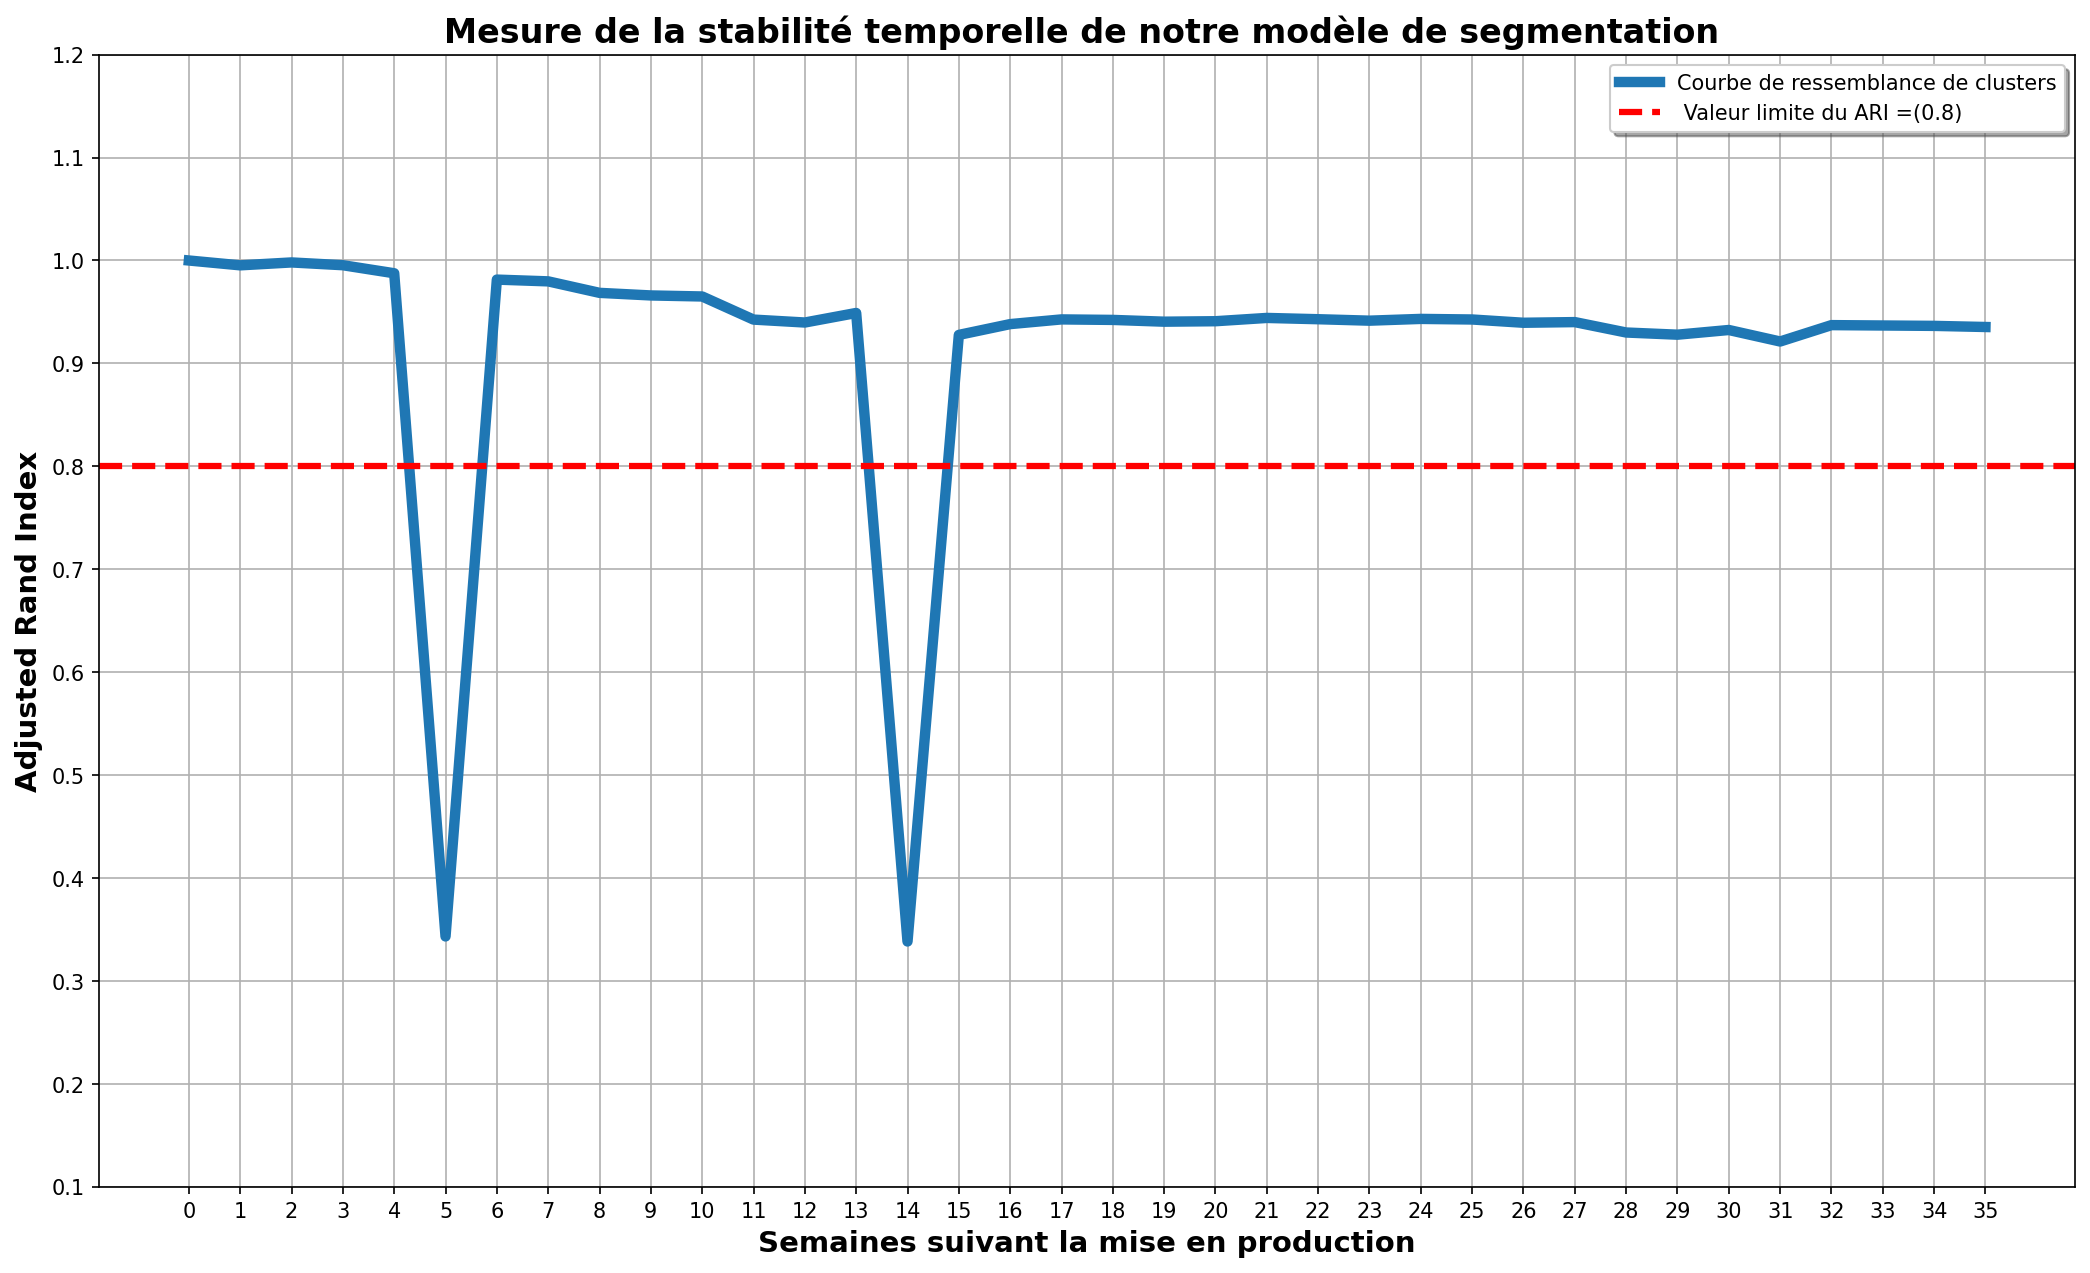

In [ ]:
# tracé de la courbe ARI en fonction du temps (en semaines ici)
plt.figure(figsize=(17, 10), dpi=150)
list_n_semaines = np.arange(0, 36)
sns.lineplot(list_n_semaines, list_ari_score_rvs, linewidth=5,
             label="Courbe de ressemblance de clusters")

plt.axhline(y=0.8, linestyle="--", c="red", linewidth=3,
            label=" Valeur limite du ARI =({})".format(0.8))

plt.title("Mesure de la stabilité temporelle de notre modèle de segmentation",
          fontsize=16, fontweight="bold")
plt.xlabel("Semaines suivant la mise en production",
           fontsize=14, fontweight="bold")
plt.xticks(np.arange(0, 36, 1))

plt.yticks(np.arange(-300, 100, 0.1))
plt.ylim(0.1, 1.2)
plt.ylabel("Adjusted Rand Index", fontsize=14, fontweight="bold")

plt.grid(True)
plt.legend(shadow=True)
plt.show()


In [ ]:
# définition
rfm_rvs_, rfm_rvs_scaled_ = rfm_period_rvs("2018-09-03",
                                           data_commande_uniq_rvs)


modèle avec 4 clusters


C:\Users\nokan\AppData\Local\Temp/ipykernel_33724/1208724465.py:83: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')  # Affichage en 3D


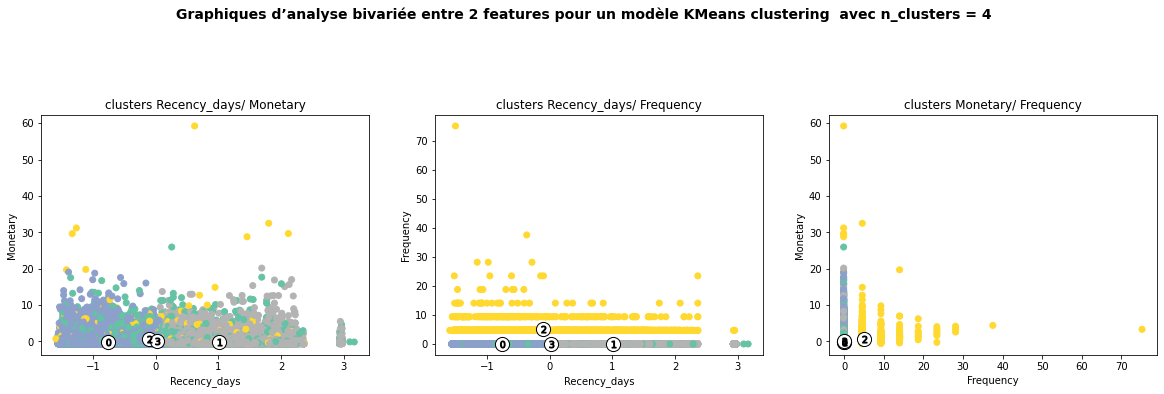

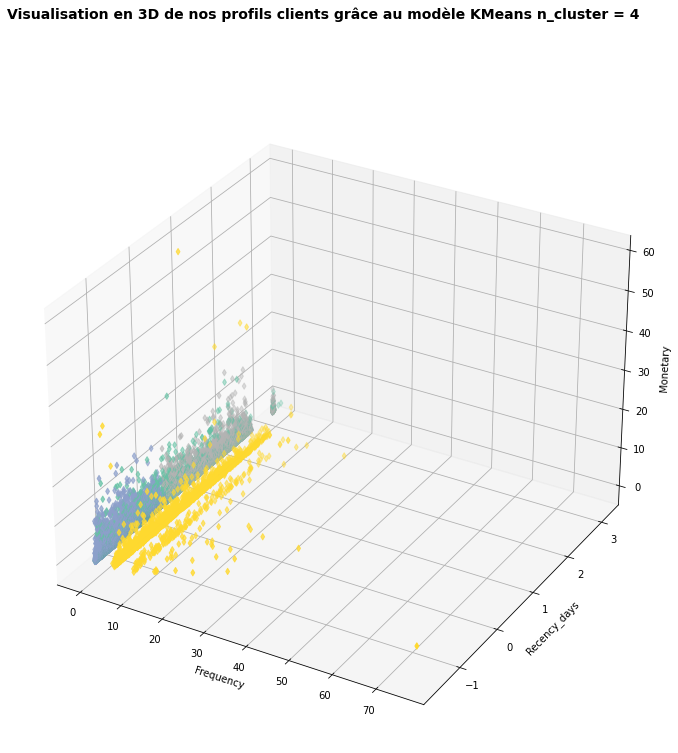

In [ ]:
kmeans__model_4_3 = KMeans(max_iter=1000, n_init=3, n_clusters=4,
                           random_state=0).fit(rfm_rvs_scaled_)

cluster_calculated_4_3 = calcul_cluster_KMeans(4, rfm_rvs_scaled_)
visualisation_cluster_KMeans(4, cluster_calculated_4_3, kmeans__model_4_3)


C:\Users\nokan\AppData\Local\Temp/ipykernel_33724/218080073.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')  # Affichage en 3D


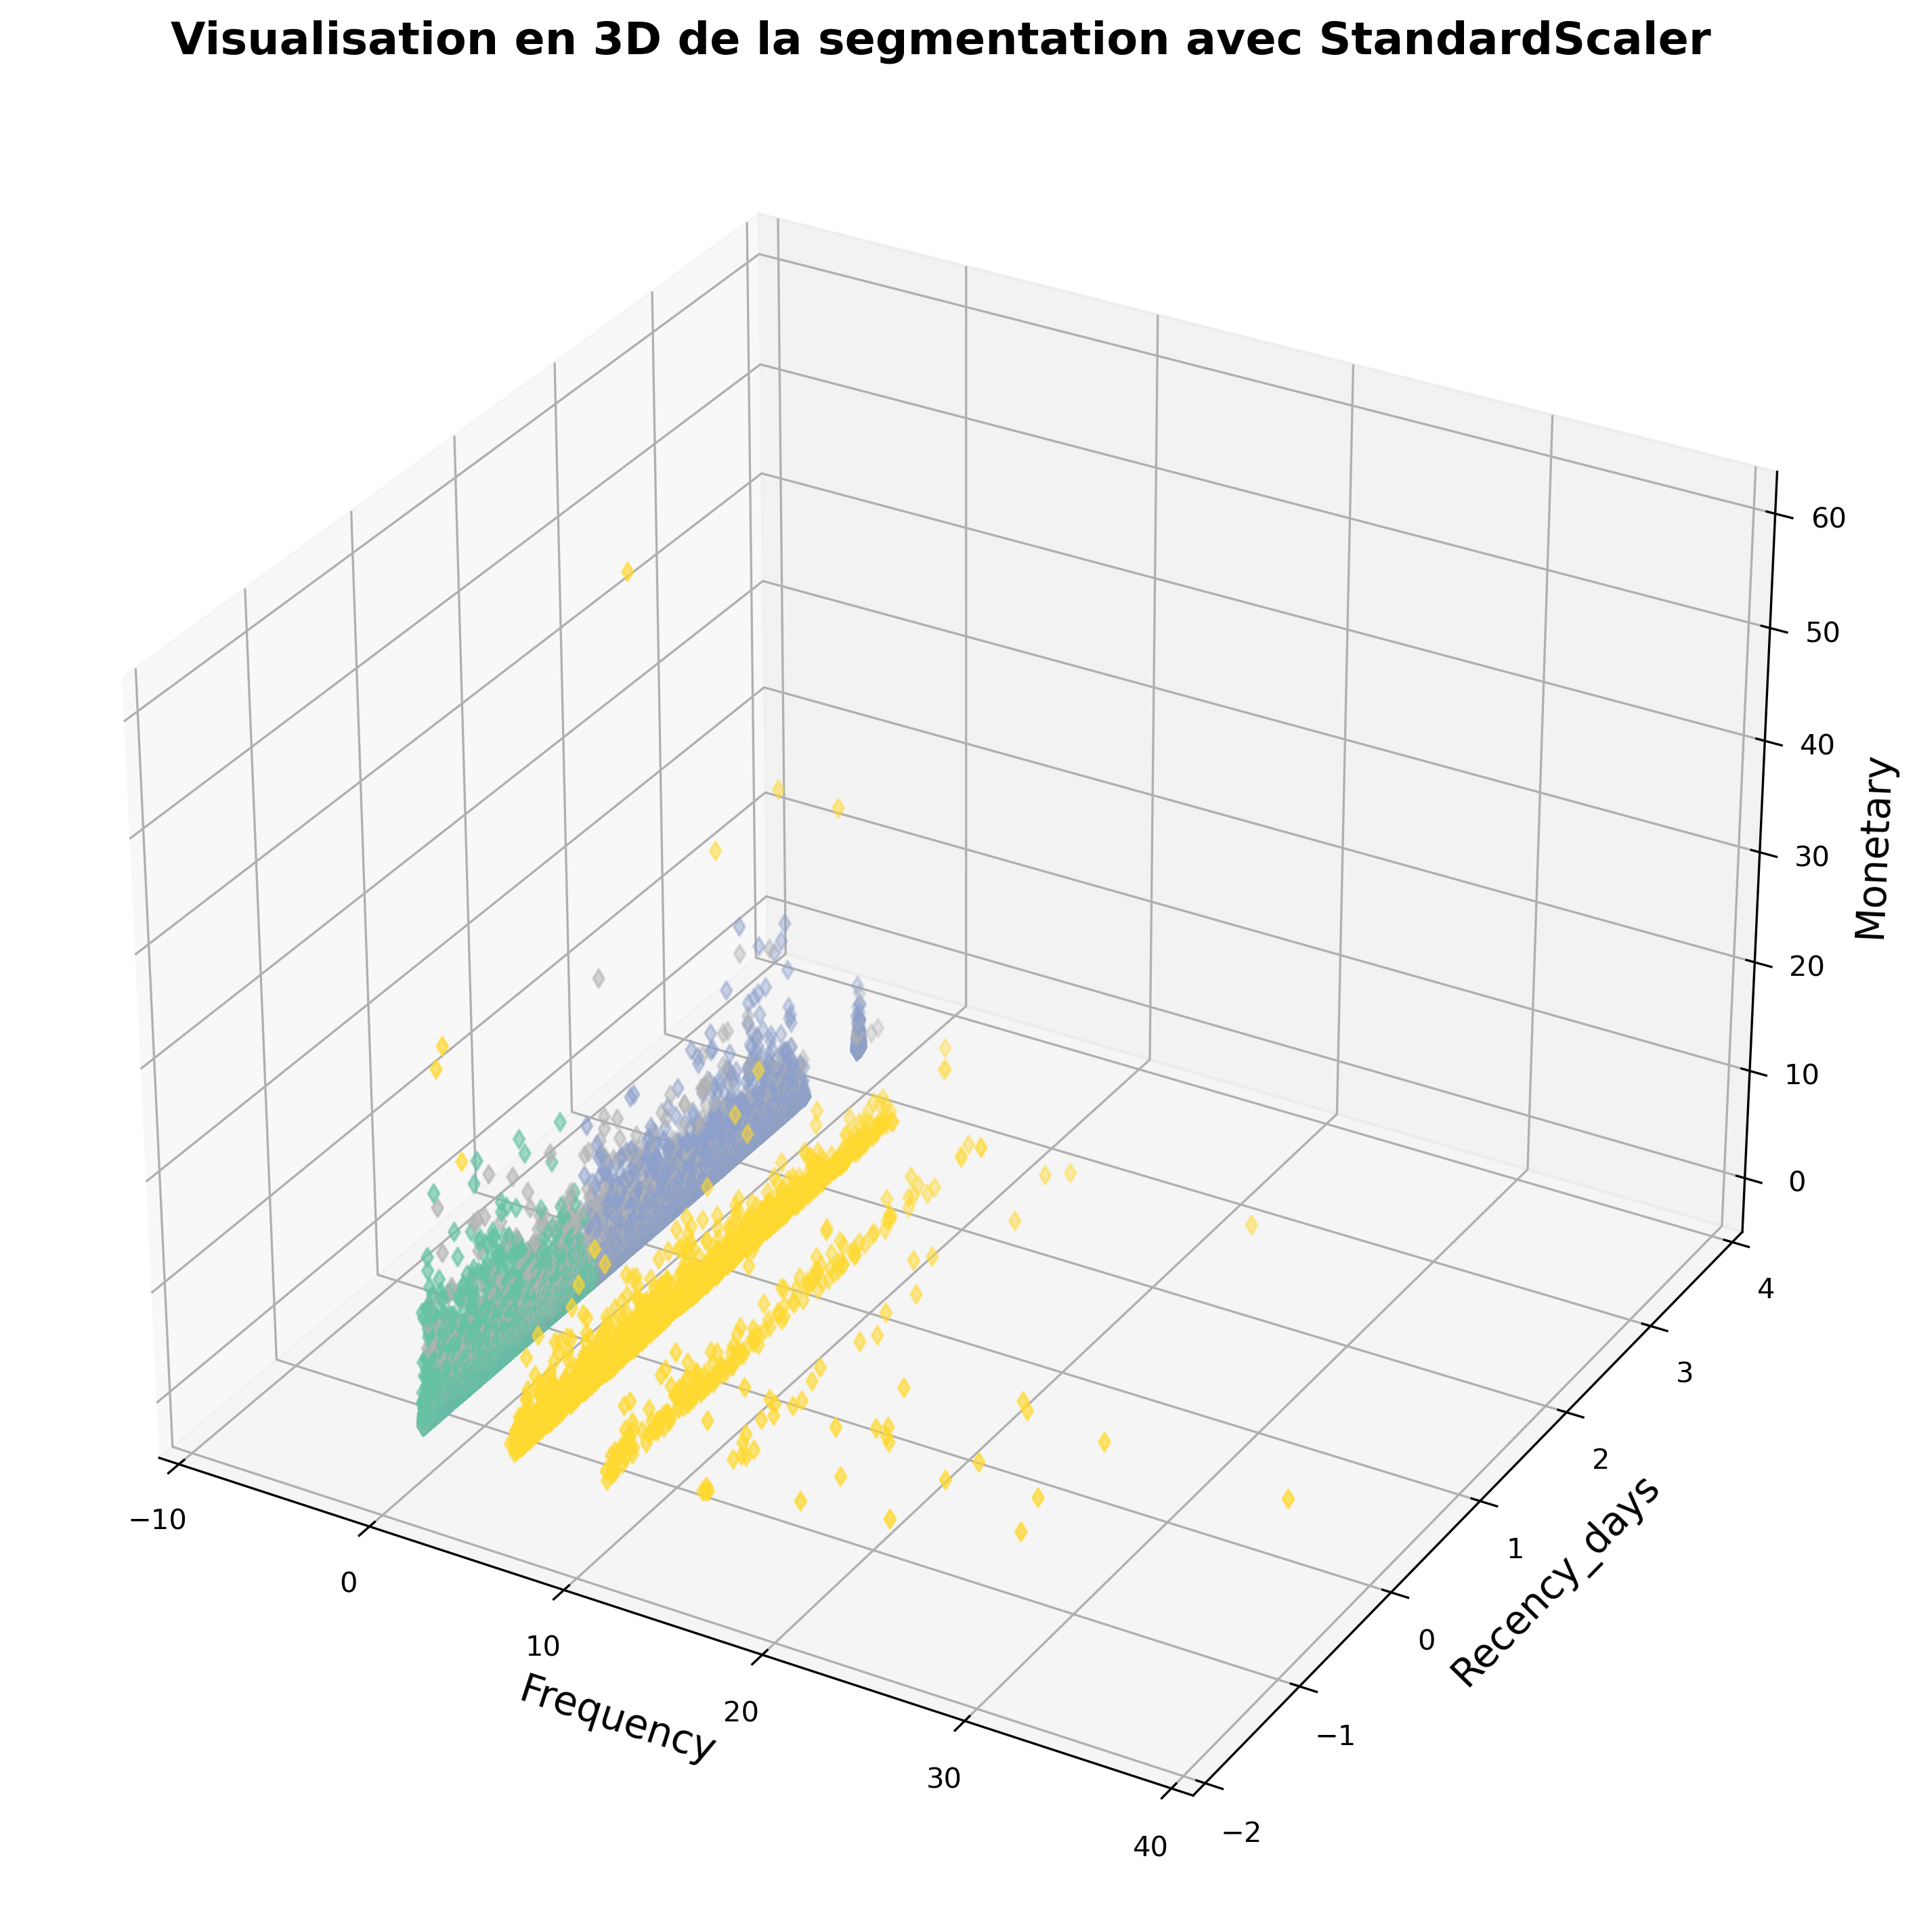

In [ ]:
cluster_rvs = rfm_rvs_scaled_.copy()
cluster_rvs["cluster_(k)"] = kmeans__model_4_3.labels_
# Tracé du résultat en 3D
fig = plt.figure(figsize=(12, 12), dpi=300)

# Affichage en 3D
ax = fig.gca(projection='3d')

# Tracé des points 3D
ax.scatter(cluster_rvs["Frequency"], cluster_rvs["Recency_days"],
           cluster_rvs["Monetary"], c=cluster_rvs['cluster_(k)'],
           cmap=plt.cm.Set2, label='Courbe', marker='d')
ax.set_xlabel('Frequency', fontsize=14)
ax.set_ylabel('Recency_days', fontsize=14)
ax.set_zlabel('Monetary', fontsize=14)

plt.title("Visualisation en 3D de la segmentation avec StandardScaler",
          fontsize=16, fontweight="bold")

plt.xlim(-10, 40)
plt.ylim(-2, 4)
plt.show()


C:\Users\nokan\AppData\Local\Temp/ipykernel_33724/1672722330.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')  # Affichage en 3D


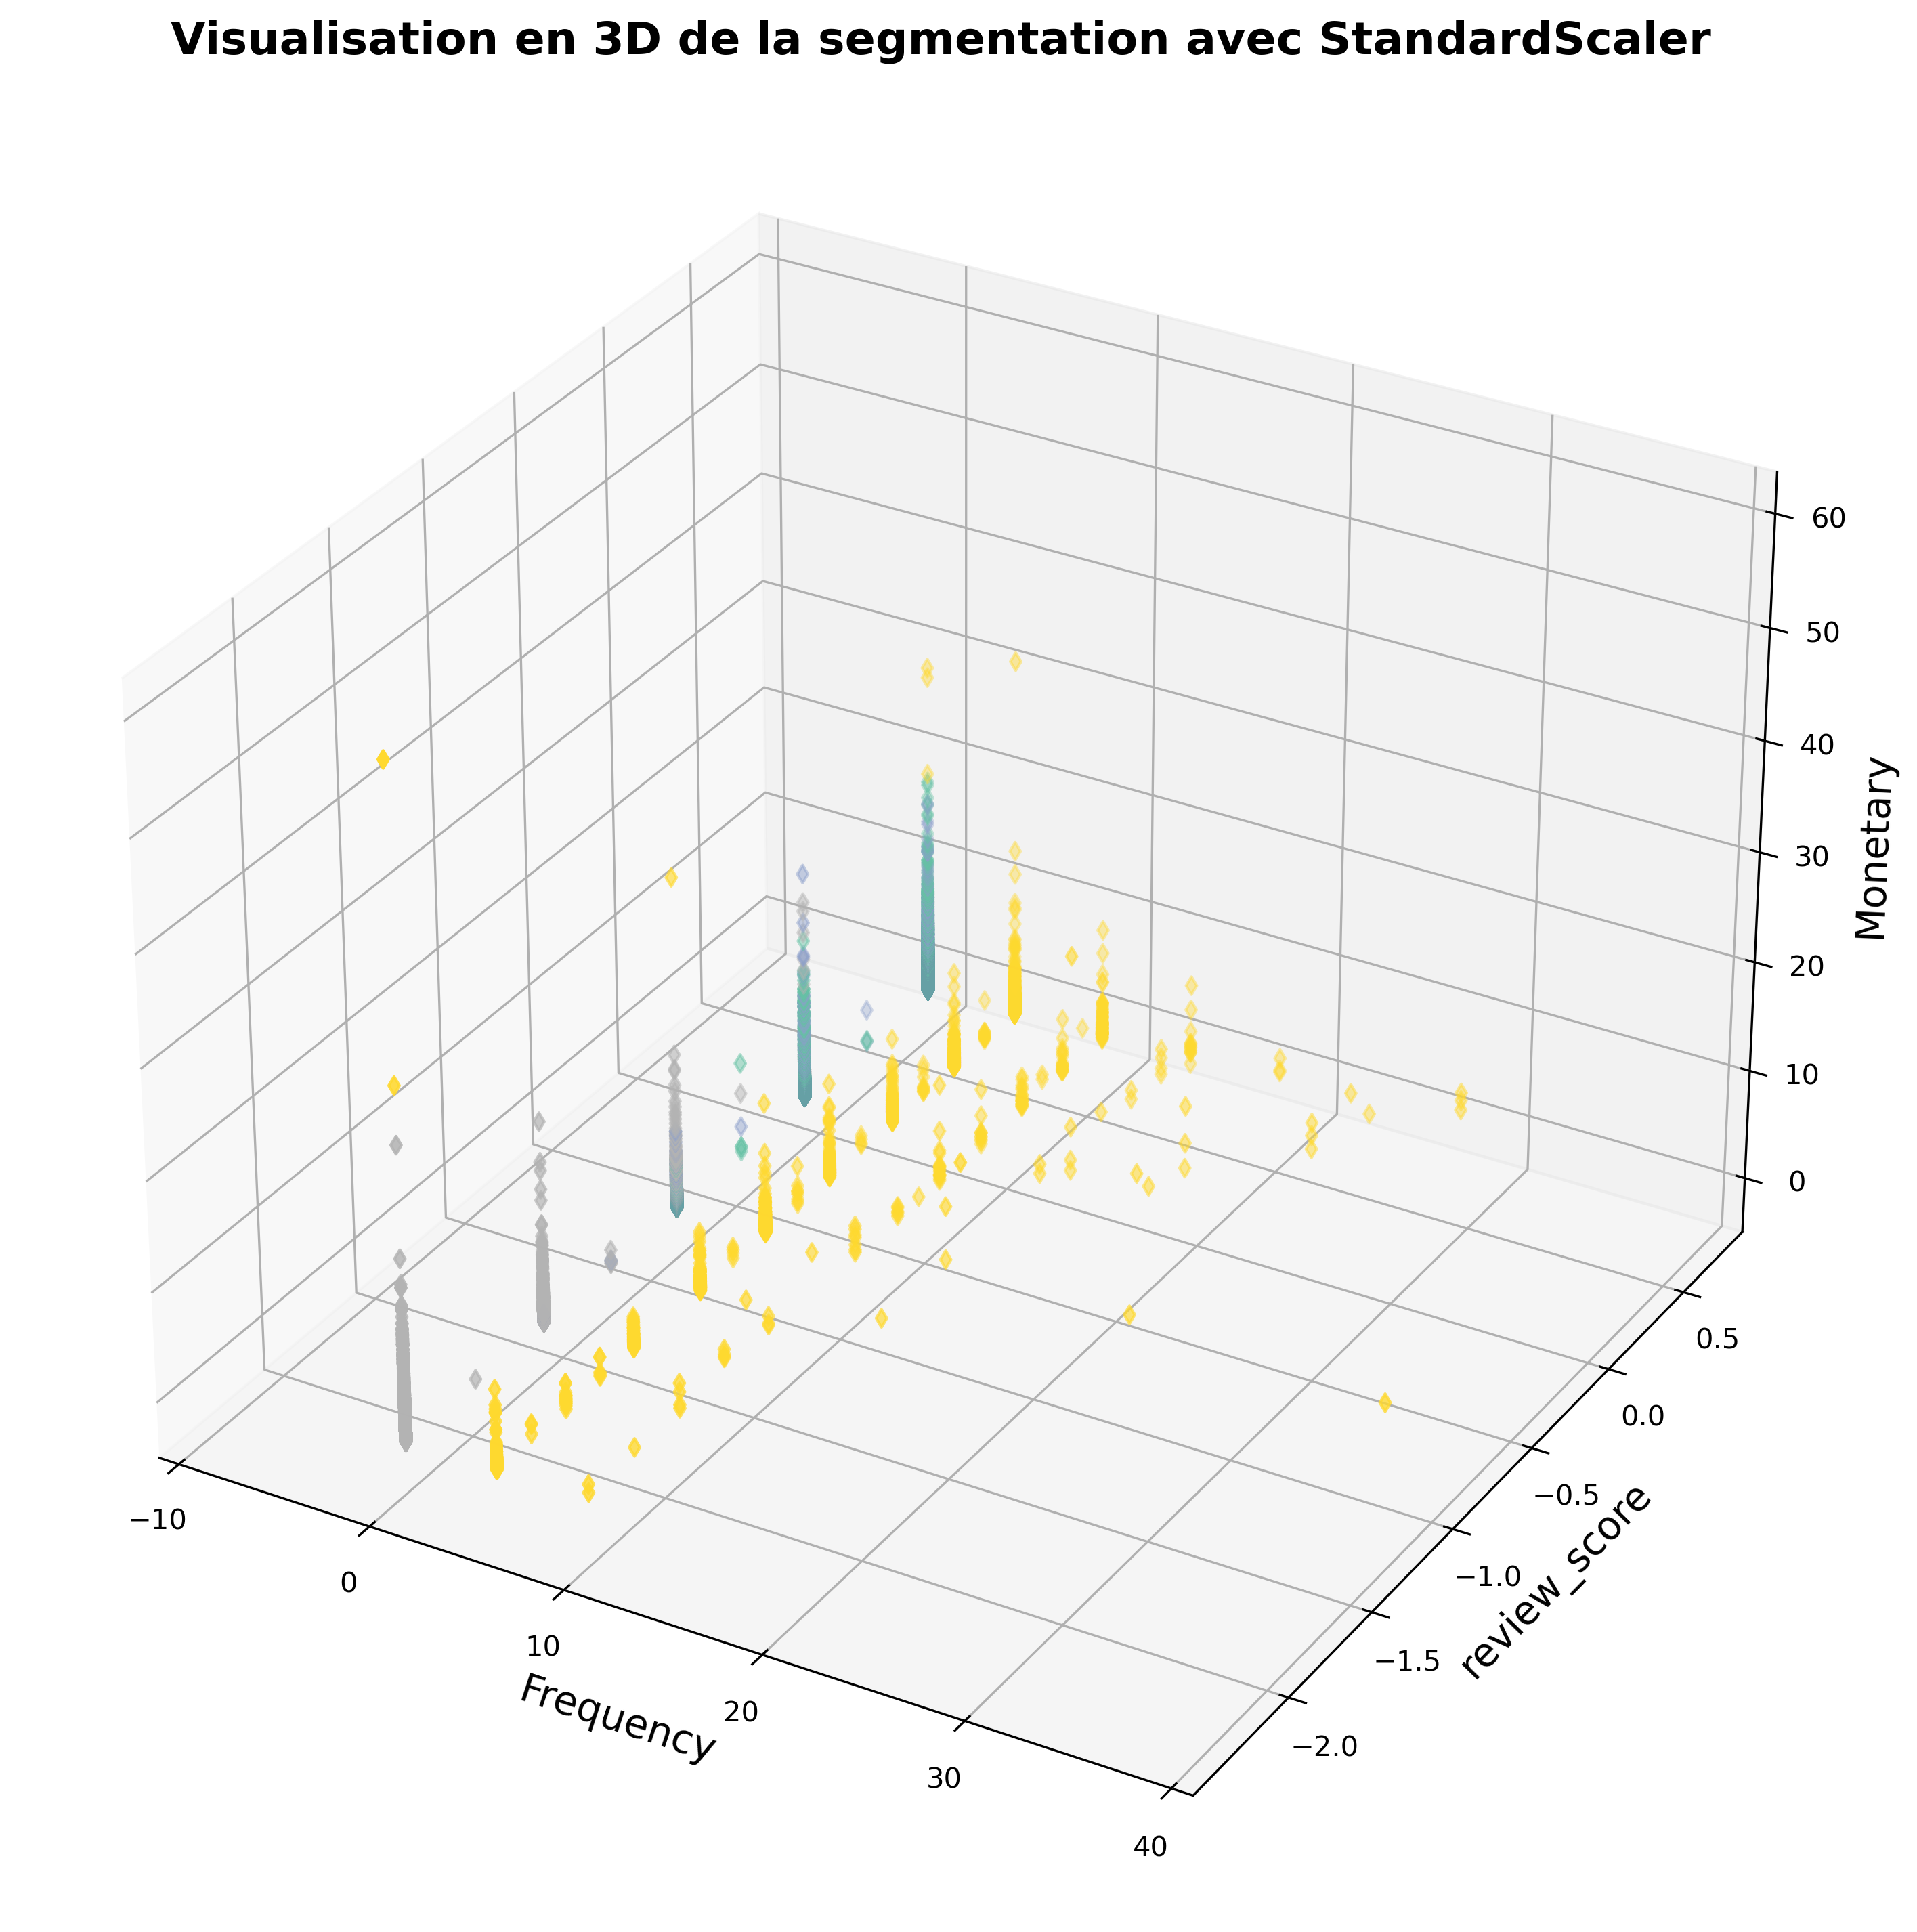

In [ ]:
# Tracé du résultat en 3D
fig = plt.figure(figsize=(12, 12), dpi=300)

# Affichage en 3D
ax = fig.gca(projection='3d')

# Tracé des points 3D
ax.scatter(cluster_rvs["Frequency"], cluster_rvs["review_score"],
           cluster_rvs["Monetary"], c=cluster_rvs['cluster_(k)'],
           cmap=plt.cm.Set2, label='Courbe', marker='d')
ax.set_xlabel('Frequency', fontsize=14)
ax.set_ylabel('review_score', fontsize=14)
ax.set_zlabel('Monetary', fontsize=14)

plt.title("Visualisation en 3D de la segmentation avec StandardScaler",
          fontsize=16, fontweight="bold")
plt.xlim(-10, 40)
plt.show()


On retrouve plus de stabilité avec review_score. Cependant la première chute se manifeste à la cinquième semaine au même titre que le modèle n'ayant pas tenu compte du review_score. Du moins, On tient dans cette étude de la satisfaction des clients voulu par Olist.